Code for the draft A multidisciplinary framework for deconstructing bots’ pluripotency in dualistic antagonism

The code has been tested on Python3.10

The majority of figures are derived from intermediate data, which is, in principle, generated from raw data. However, the processing functions for generating this intermediate data are not provided. This omission is due to the fact that additional tweet information may violate X Policies. We may provide the additional information of intermediate data upon request.






# Bot score

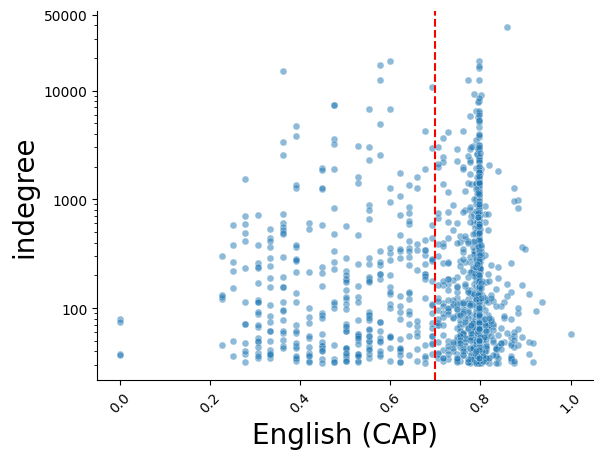

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

boten=pd.read_csv('test_label_Bucha_en.csv')
score=pd.read_csv('./analysis/botscore_RT.csv')

score=score[score['indegree']>30]
ax=sns.scatterplot(data=score[['cap.english','indegree']], x='cap.english',y='indegree', alpha=0.5,s=25)
plt.xticks(rotation=45)
#plt.xscale('log')
plt.yscale('log')

ax.set_xlabel("CAP")
ax.set_yticks([100, 1000, 10000,50000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('CAP', labelpad=40)
ax.set_xlabel('English (CAP)', fontsize = 20)
ax.set_ylabel('indegree', fontsize = 20)

plt.axvline(x=.7,color='red',linestyle ='--') 
sns.despine()

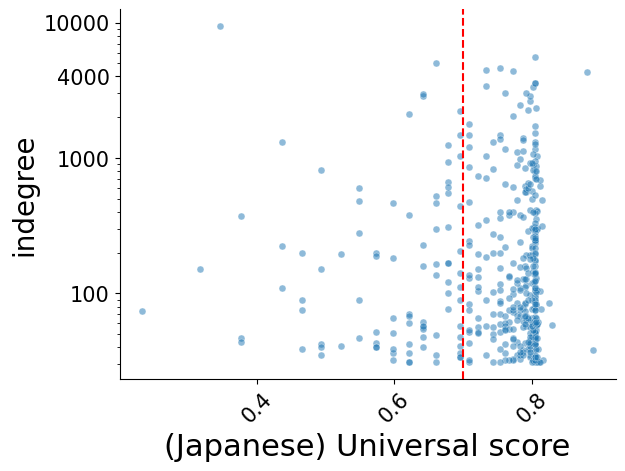

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

scoreja=pd.read_csv('./analysis/Botscore_ja_3core_RT.csv')
scoreja=scoreja[['user.user_data.screen_name','cap.universal']]
modudf=pd.read_csv('./japan/ja_3core_RT.csv')

def score_spliter(score):
   

    temp=modudf.sort_values('indegree',ascending=False)
    temp=temp[temp['indegree']>30]

    score['indegree']=''

   
    score.update(temp)

    score = score[score['cap.universal']!='cap.universal']
    score=score[['cap.universal','indegree']]
    score['cap.universal']=pd.to_numeric(score['cap.universal'])
    score['cap.universal']=score['cap.universal'].round(3)  
    return score

scoreja=score_spliter(scoreja)

temp=scoreja[['cap.universal','indegree']]
temp=temp[temp['indegree']!='']
temp['indegree']=temp['indegree'].astype('Int64')
ax=sns.scatterplot(data=temp, x='cap.universal',y='indegree', alpha=0.5,s=25)
plt.xticks(rotation=45)
#plt.xscale('log')
plt.yscale('log')

ax.set_xlabel("CAP")
ax.set_yticks([100, 1000,4000,10000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel('CAP', labelpad=40)
ax.set_xlabel('(Japanese) Universal score', fontsize = 22)
ax.set_ylabel('indegree', fontsize = 20)

plt.axvline(x=.7,color='red',linestyle ='--') 
sns.despine()

15
Class
pro-Russia bot          8
pro-Russia human       56
pro-Ukraine bot       375
pro-Ukraine human    1596
dtype: int64


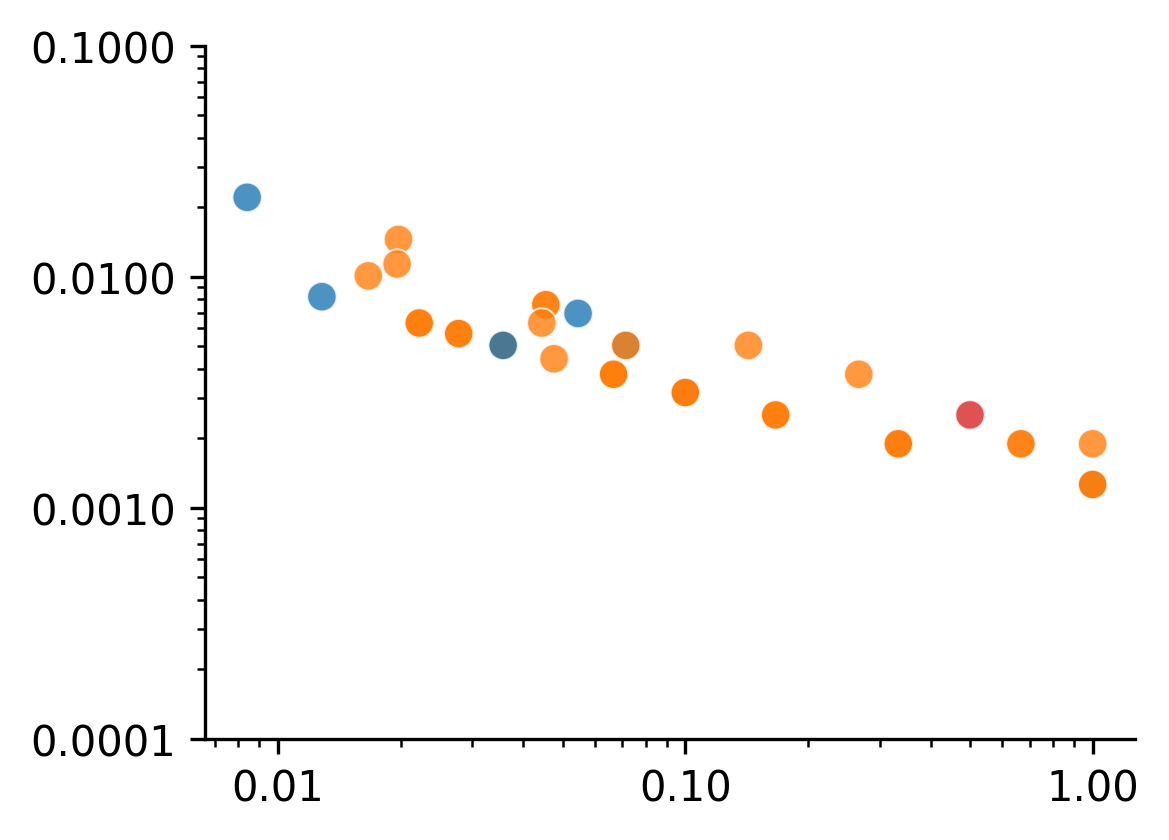

25
Class
pro-Russia bot         16
pro-Russia human       84
pro-Ukraine bot       563
pro-Ukraine human    2316
dtype: int64


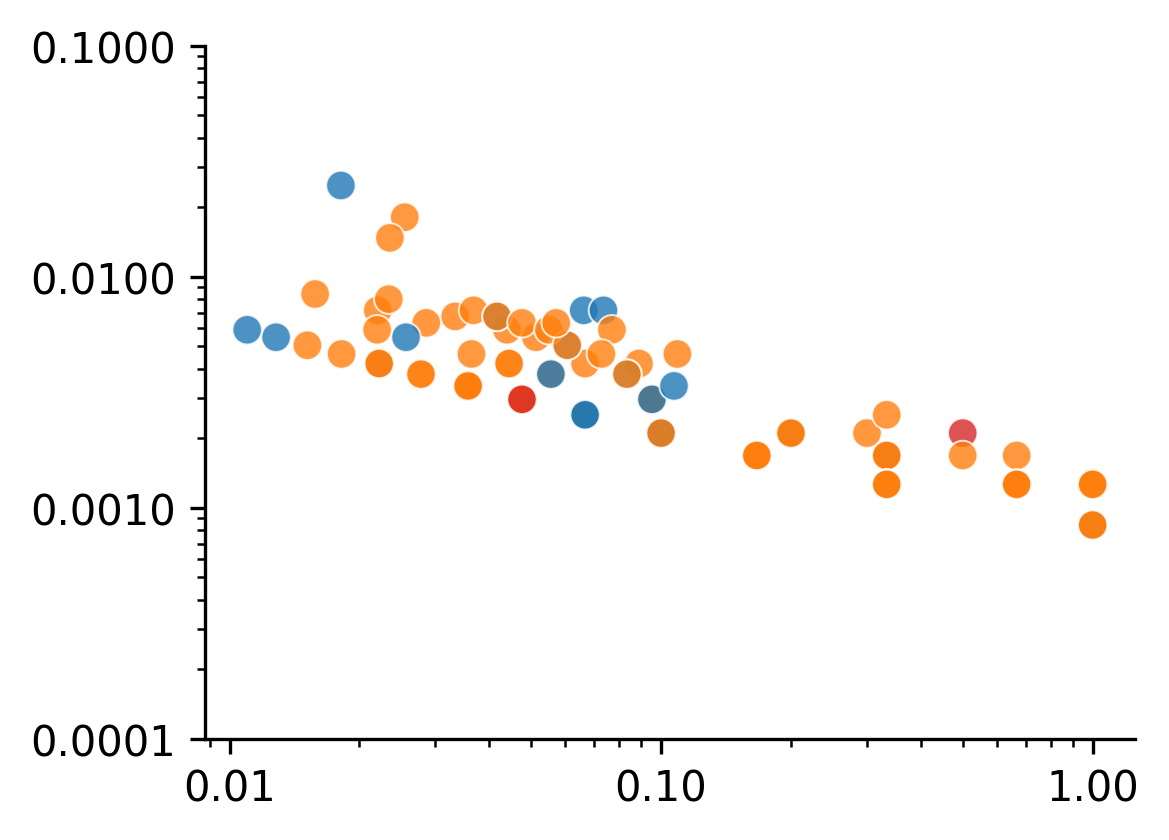

35
Class
pro-Russia bot         25
pro-Ukraine bot       735
pro-Ukraine human    2996
dtype: int64


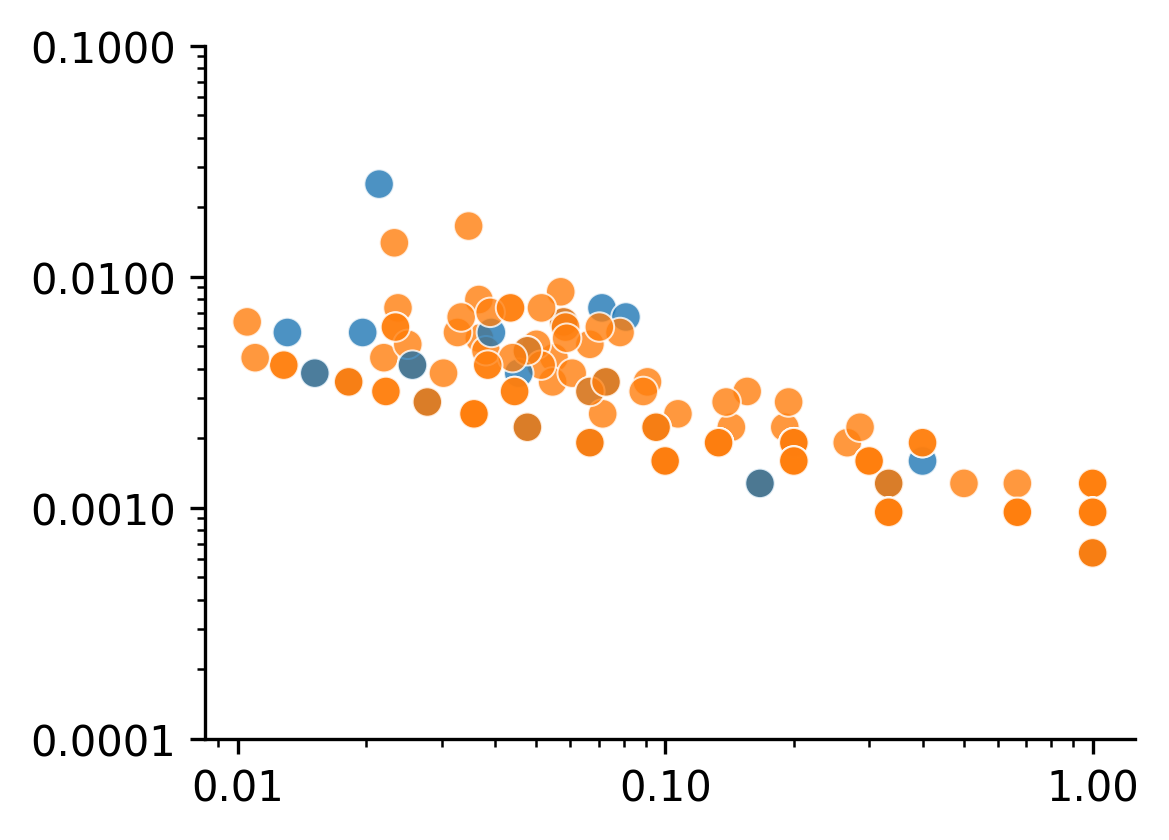

45
Class
pro-Russia bot         32
pro-Russia human      142
pro-Ukraine bot       891
pro-Ukraine human    3584
dtype: int64


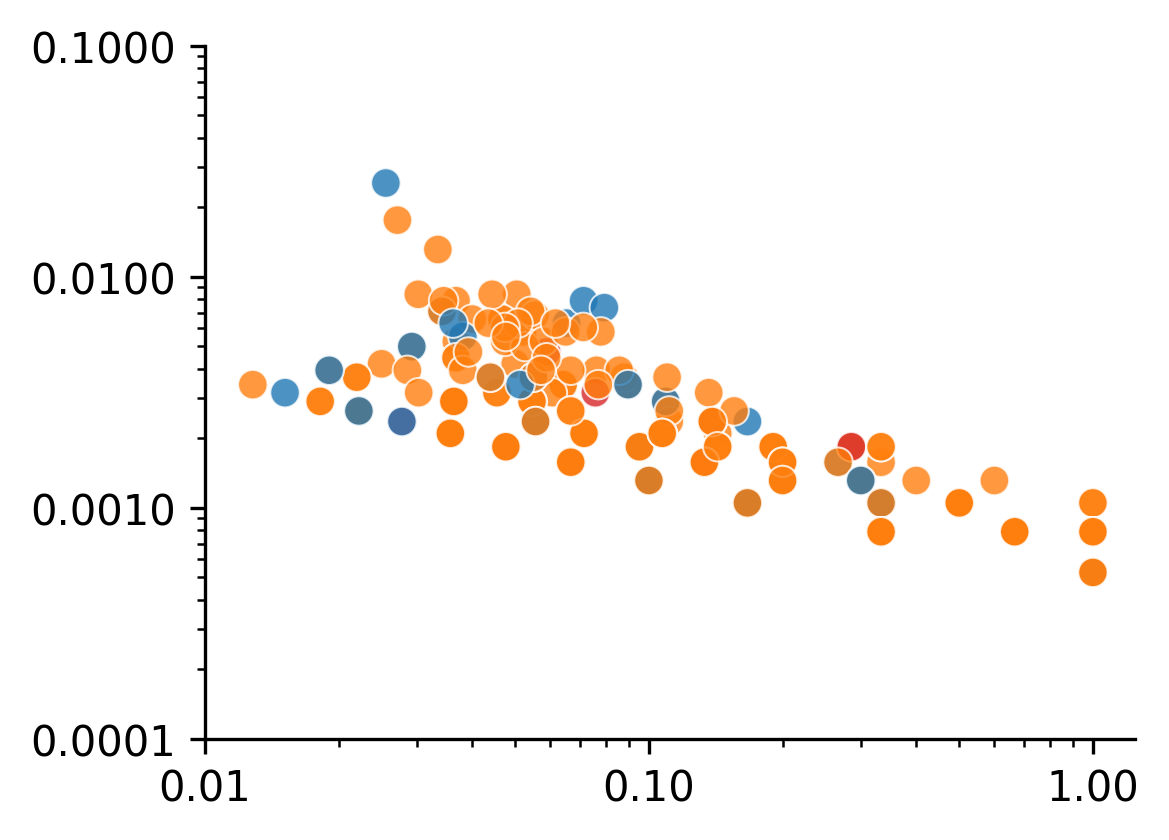

55
Class
pro-Russia bot         36
pro-Russia human      165
pro-Ukraine bot      1032
pro-Ukraine human    4114
dtype: int64


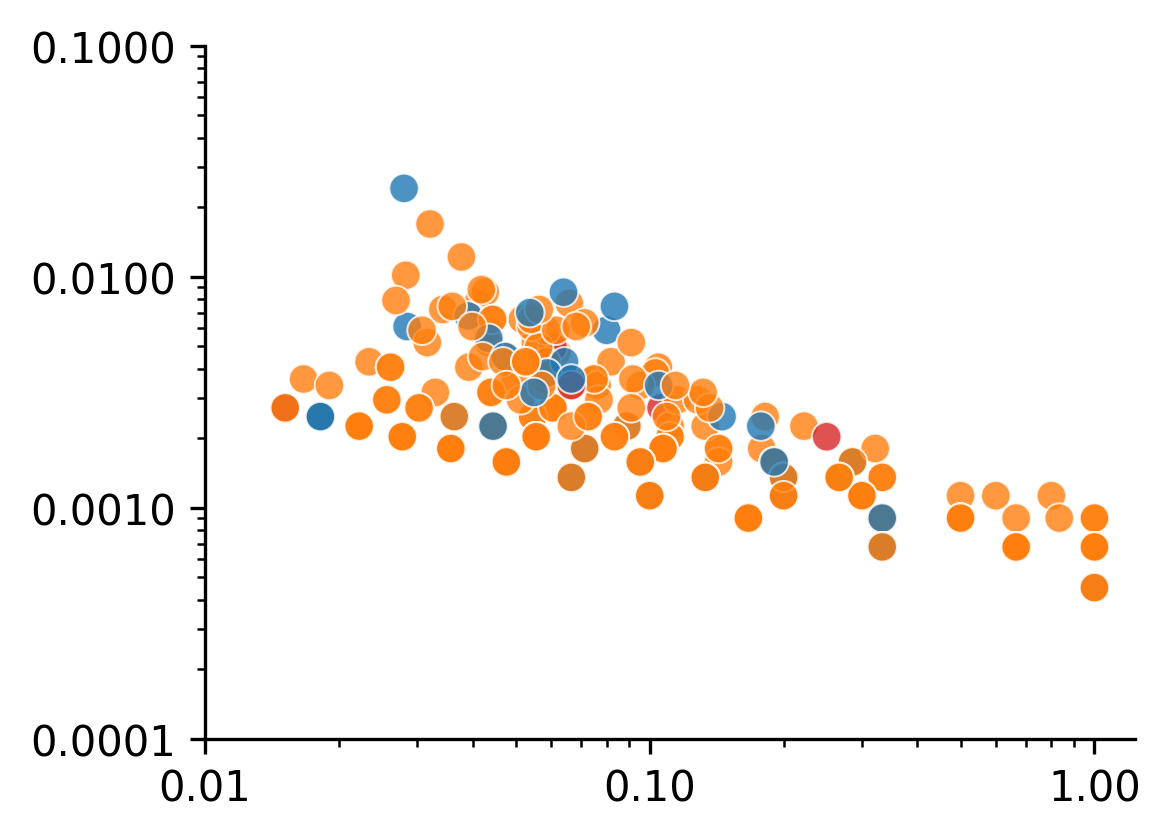

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')


def round_sigfigs(num, sig_figs):
    num = Decimal(str(num))
    if num == 0:
        return 0
    return round(num, -int(num.adjusted()) + (sig_figs - 1))



def countdf(_df,_Gdf):
    k=0
    _df.reset_index(inplace=True, drop=True)
    _Gdflst = _Gdf[['source','target']].values.tolist()
    for i in range(_df.shape[0]):
        _each=_df[i:i+1]
        _each=_each.reindex(columns=['target','source','edge_type','weight','author_Class',	'parent_Class'])
        _each=_each[['target','source']]
        _eachlst = _each.values.tolist()[0]
        if _eachlst in _Gdflst:
            k+=1
        
    return k


def returnNt(_t,_df):

    _nt=_t.shape[0]/2
    if _t.shape[0] != countdf(_t,_df):
        _nt=_t.shape[0]%2+_nt
    return _nt
    
def returnGdf(_G,_dic,_t):
    _df=nx.to_pandas_edgelist(_G)

    _df['source'] = _df['source'].astype(int)
    _df['target'] = _df['target'].astype(int)
    _df['author_Class']=_df['source'].map(_dic)
    _df['parent_Class']=_df['target'].map(_dic)
    
    _df.dropna(inplace=True)
    
      #(_df.query("`author_Class`==`parent_Class` & `parent_Class`== `author_Class`").shape[0]/2+_df.query("`author_Class`!=`parent_Class`").shape[0])
    _t1 = _df.query("`author_Class`.str.contains('human') & `parent_Class`.str.contains('bot')")
    _t2 = _df.query("`author_Class`.str.contains('human') & `parent_Class`.str.contains('human')")
    _t3 = _df.query("`author_Class`.str.contains('bot') & `parent_Class`.str.contains('bot')")
    _allN = returnNt(_t1,_df)+returnNt(_t2,_df)+returnNt(_t3,_df)
    
  
    _rate1 = returnNt(_t1,_df) / _allN * 100
    _rate2 = returnNt(_t2,_df) / _allN * 100
    _rate3 = returnNt(_t3,_df) / _allN * 100
    _ratedf = pd.DataFrame([[_rate1,_rate2,_rate3]],index=[i],columns=['Human-bot','Human-human','Bot-bot'])
    _ratedf= _ratedf.applymap(lambda x: round_sigfigs(x,2))
    return _ratedf

lang='en'
Ratedf=pd.DataFrame()
t=300*2
DF1=pd.DataFrame()
for i in range(15,60,10):
    print(i)
    
    G=nx.read_graphml('test_Bucha_'+lang+str(i)+'.graphml')

    ce = nx.clustering(G)
    
    ctr=nx.degree_centrality(G)

    dct = {k:[v] for k,v in ce.items()}
    
    df1=pd.DataFrame(dct).T.reset_index()
    
    df1.columns=['Id','clustering coefficient']
    
    dct = {k:[v] for k,v in ctr.items()} 
    
    df2=pd.DataFrame(dct).T.reset_index()
    
    df2.columns=['Id','centrality']

    df1['Id']=df1['Id'].astype(int)
    df1['centrality']=df2['centrality']

    #csv = pd.read_csv('label_file_'+lang+'.csv')
    csv = pd.read_csv('test_'+str(i)+'s.csv')

    csv['Class']=csv['stance']+' '+ csv['class']
    dic=dict(zip(csv.Id,csv.Class))

    df1['Class']=df1['Id'].map(dic)
    
    ratedf=returnGdf(G,dic,i)
    Ratedf=pd.concat([Ratedf,ratedf])

 
    df1=df1[df1['Class']!='']
    
    df1['time window']=i
    DF1=pd.concat([df1,DF1])


    print(df1.groupby('Class').size())
    
    hue_order=['']

    g=sns.scatterplot(data=df1,y='centrality',x='clustering coefficient',hue='Class',hue_order=['pro-Ukraine bot','pro-Ukraine human','pro-Russia bot','pro-Russia human'],alpha=0.8)
    
    plt.xscale('log')
    plt.yscale('log') 
    fig = plt.gcf()

   
    new_size = (4, 3) 
    fig.set_size_inches(new_size)
    scatters = plt.gca().collections[0]
    scatters.set_sizes([50])
    
    g.set_yticks([0.0001, 0.001,0.01,0.1])
    g.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    g.set_xticks([0.01,0.1, 1])
    g.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
      
    g.set(xlabel=None)
    g.set(ylabel=None)
    
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    legend = ax.legend()
    
    legend.remove()
   
    plt.show()


120
Class
pro-Russia bot         3
pro-Russia human       2
pro-Ukraine bot       54
pro-Ukraine human    112
dtype: int64


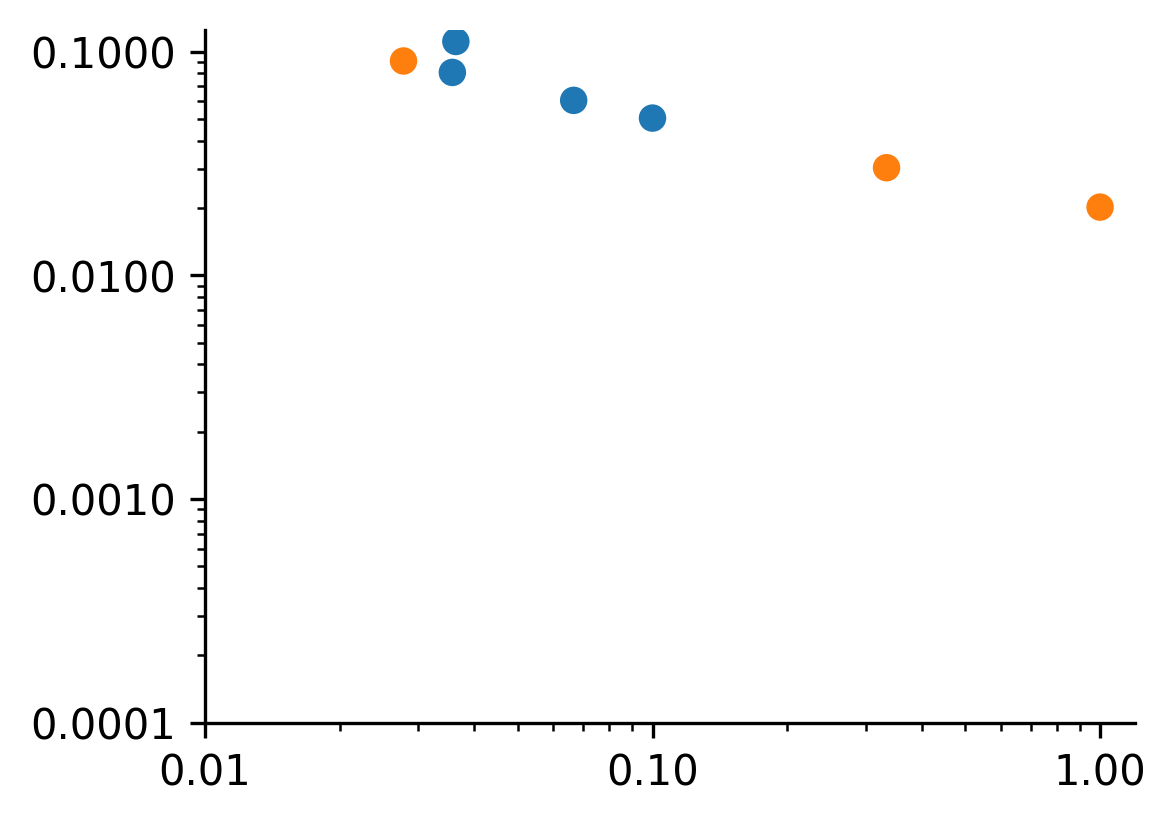

240
Class
pro-Russia bot         4
pro-Russia human       4
pro-Ukraine bot       75
pro-Ukraine human    180
dtype: int64


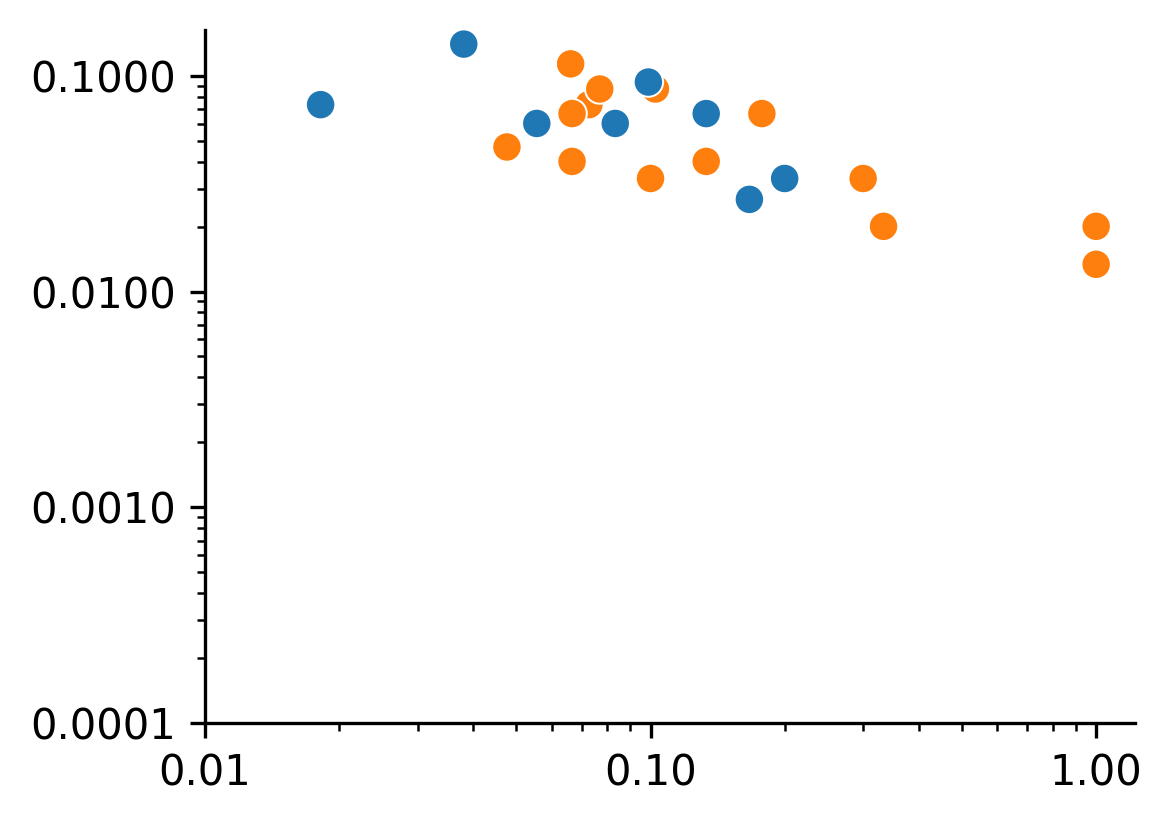

360
Class
pro-Russia bot         4
pro-Russia human       6
pro-Ukraine bot       91
pro-Ukraine human    220
dtype: int64


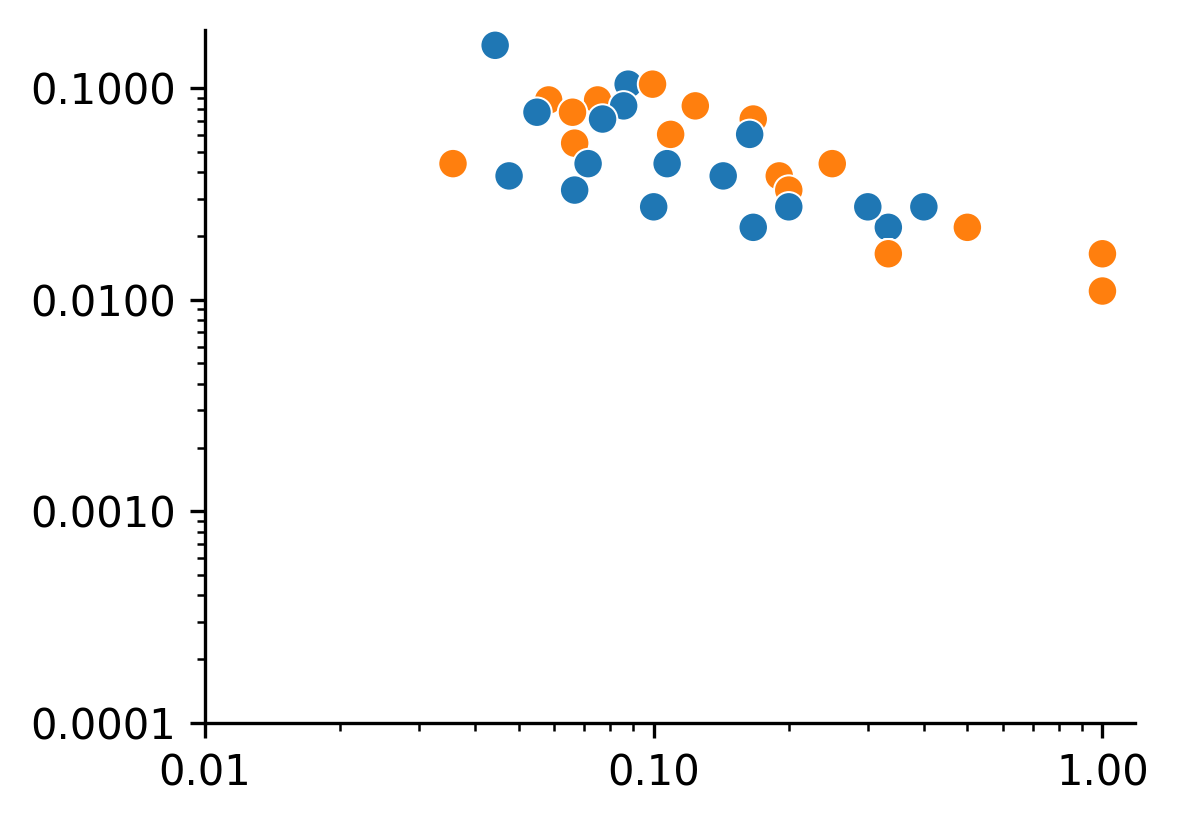

480
Class
pro-Russia bot         4
pro-Russia human       7
pro-Ukraine bot      111
pro-Ukraine human    253
dtype: int64


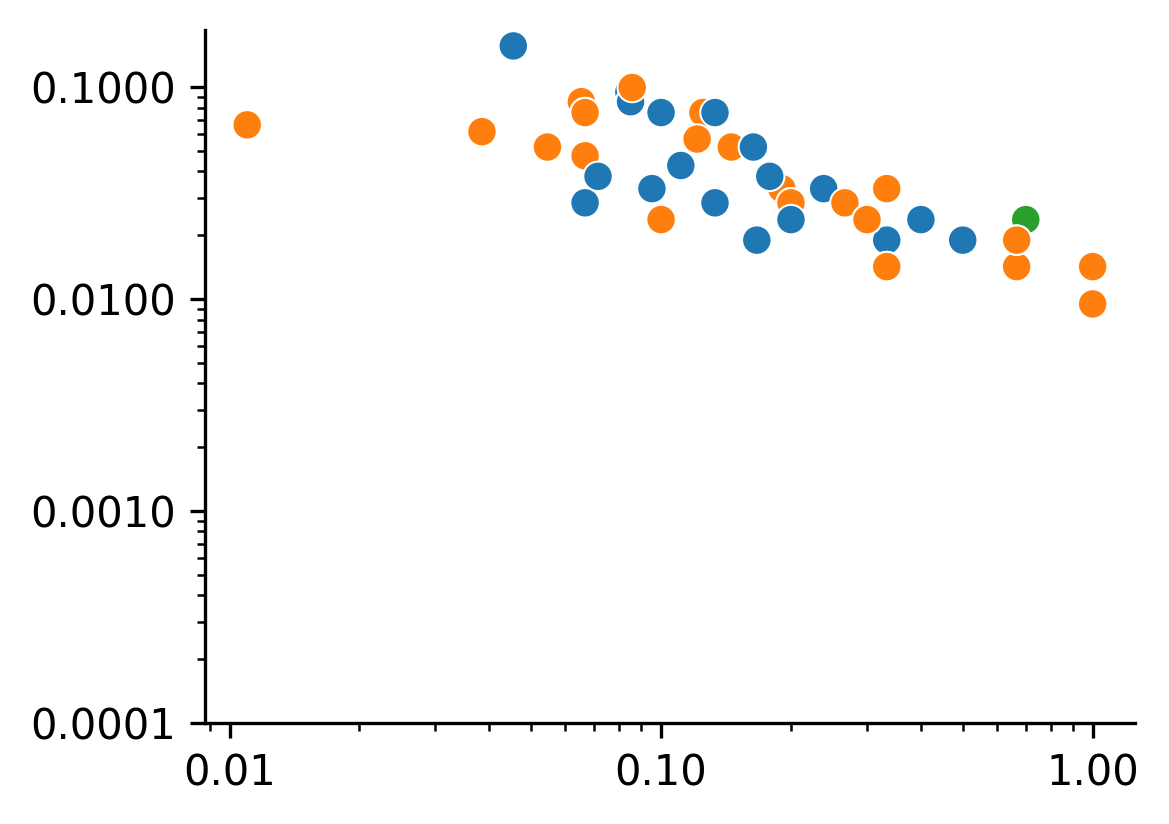

600
Class
pro-Russia bot         4
pro-Russia human       7
pro-Ukraine bot      128
pro-Ukraine human    275
dtype: int64


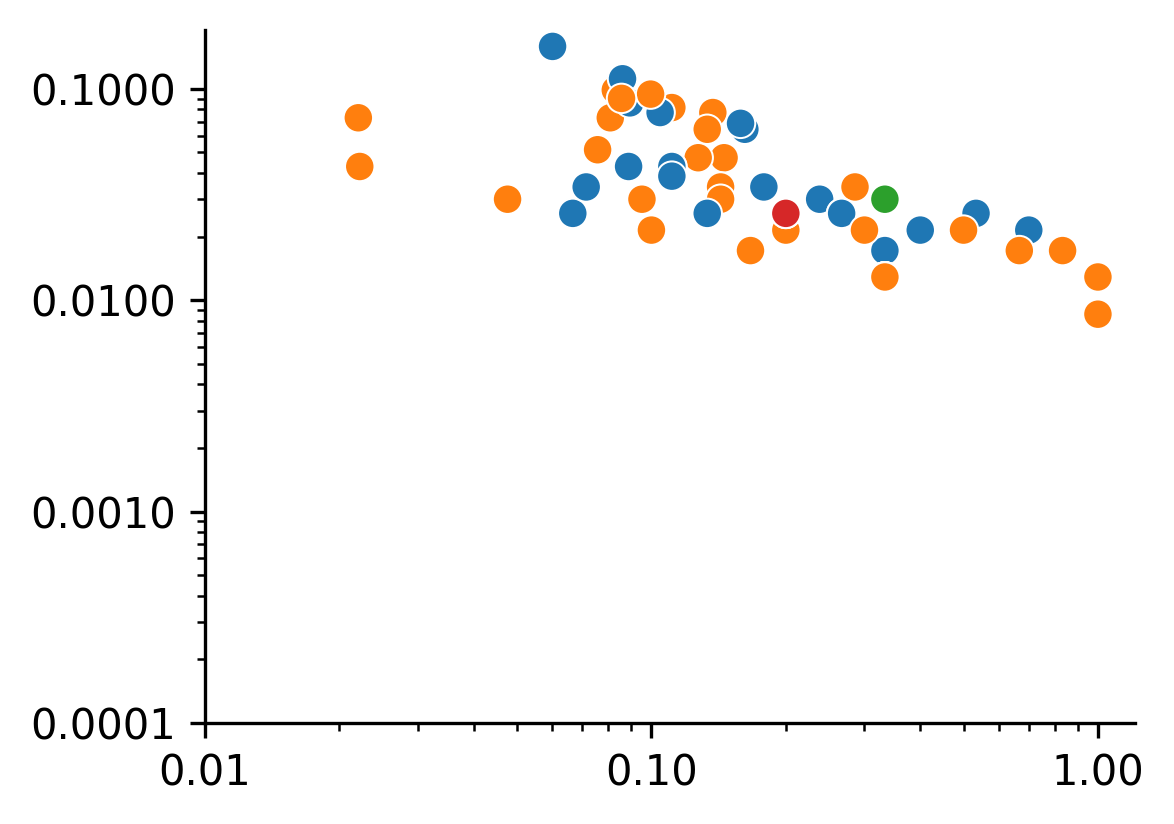

In [5]:
#lang='fr'#t=300*2
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

def round_sigfigs(num, sig_figs):
    num = Decimal(str(num))
    if num == 0:
        return 0
    return round(num, -int(num.adjusted()) + (sig_figs - 1))


def countdf(_df,_Gdf):
    k=0
    _df.reset_index(inplace=True, drop=True)
    _Gdflst = _Gdf[['source','target']].values.tolist()
    for i in range(_df.shape[0]):
        _each=_df[i:i+1]
        _each=_each.reindex(columns=['target','source','edge_type','weight','author_Class',	'parent_Class'])
        _each=_each[['target','source']]
        _eachlst = _each.values.tolist()[0]
        if _eachlst in _Gdflst:
            k+=1
        
    return k


def returnNt(_t,_df):

    _nt=_t.shape[0]/2
    if _t.shape[0] != countdf(_t,_df):
        _nt=_t.shape[0]%2+_nt
    return _nt
    
def returnGdf(_G,_dic,_t):
    _df=nx.to_pandas_edgelist(_G)

    _df['source'] = _df['source'].astype(int)
    _df['target'] = _df['target'].astype(int)
    _df['author_Class']=_df['source'].map(_dic)
    _df['parent_Class']=_df['target'].map(_dic)
    
    _df.dropna(inplace=True)
    
    _t1 = _df.query("`author_Class`.str.contains('human') & `parent_Class`.str.contains('bot')")
    _t2 = _df.query("`author_Class`.str.contains('human') & `parent_Class`.str.contains('human')")
    _t3 = _df.query("`author_Class`.str.contains('bot') & `parent_Class`.str.contains('bot')")
    _allN = returnNt(_t1,_df)+returnNt(_t2,_df)+returnNt(_t3,_df)
    
    
    _rate1 = returnNt(_t1,_df) / _allN * 100
    _rate2 = returnNt(_t2,_df) / _allN * 10
    _rate3 = returnNt(_t3,_df) / _allN * 100
    _ratedf = pd.DataFrame([[_rate1,_rate2,_rate3]],index=[i],columns=['Human-bot','Human-human','Bot-bot'])
    _ratedf= _ratedf.applymap(lambda x: round_sigfigs(x,2))
    return _ratedf


lang='de'
t=120
Ratedf=pd.DataFrame()
DF2=pd.DataFrame()
for i in range(t,t*6,t):
    
    G=nx.read_graphml('test_Bucha_'+lang+str(i)+'.graphml')

    ce = nx.clustering(G)
    
    ctr=nx.degree_centrality(G)

    dct = {k:[v] for k,v in ce.items()}
    
    df1=pd.DataFrame(dct).T.reset_index()
    
    df1.columns=['Id','clustering coefficient']
    
    dct = {k:[v] for k,v in ctr.items()} 
    
    df2=pd.DataFrame(dct).T.reset_index()
    
    df2.columns=['Id','centrality']

    df1['Id']=df1['Id'].astype(int)
    
    df1['centrality']=df2['centrality']

    csv = pd.read_csv('label_file_'+lang+'.csv')

    dic=dict(zip(csv.Id,csv.Class))

    df1['Class']=df1['Id'].map(dic)
    
    ratedf=returnGdf(G,dic,i)
    Ratedf=pd.concat([Ratedf,ratedf])
    

    df1=df1[df1['Class']!='']
    
    df1['time window']=i
    DF2=pd.concat([df1,DF2])


    print(df1.groupby('Class').size())
    
  
    hue_order=['']

    g=sns.scatterplot(data=df1,y='centrality',x='clustering coefficient',hue='Class',hue_order=['pro-Ukraine bot','pro-Ukraine human','pro-Russia bot','pro-Russia human'],alpha=1)
    
    plt.xscale('log')
    plt.yscale('log') 
    fig = plt.gcf()

    
    new_size = (4, 3)  
    fig.set_size_inches(new_size)
    scatters = plt.gca().collections[0]
    scatters.set_sizes([50])
    
    g.set_yticks([0.0001, 0.001,0.01,0.1])
    g.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    g.set_xticks([0.01,0.1, 1])
    g.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
      
    g.set(xlabel=None)
    g.set(ylabel=None)
    
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    legend = ax.legend()
    
    legend.remove()

    plt.savefig('test_'+lang+'_'+str(i)+'.png',bbox_inches="tight")
    plt.savefig('test_'+lang+'_'+str(i)+'.pdf',bbox_inches="tight")
    plt.savefig('test_'+lang+'_'+str(i)+'.jpg',bbox_inches="tight")
    plt.savefig('test_'+lang+'_'+str(i)+'.tiff',bbox_inches="tight")
   
    plt.show()


# X cascades

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('./data/bucha_ref.csv')

data['created_at']=[pd.Timestamp(x) for x in data.created_at]


data.dropna(subset=['entities.urls'],inplace=True)
data=data[data['entities.urls']!=np.nan]
for each in ['entities.urls']:
    data[each]=data[each].apply(lambda x : x.strip('[]'))
    data[each]=data[each].apply(lambda x : x.strip('\'')) 
    data[each]=data[each].apply(lambda x : x.replace('"','')) 



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter


def scientific(x, pos):
   
    return '2E' % x

userlst=pd.read_csv('./analysis/english_bucha_class.csv')
pro_russia_human=userlst[userlst['class']=='pro-Russia human']['Id']
pro_russia_bot=userlst[userlst['class']=='pro-Russia bot']['Id']
pro_ukraine_human=userlst[userlst['class']=='pro-Ukraine human']['Id']
pro_ukraine_bot=userlst[userlst['class']=='pro-Ukraine bot']['Id']


ukdata_human = data[(data['author.username'].isin(pro_ukraine_human))]
ukdata_bot = data[(data['author.username'].isin(pro_ukraine_bot))]

rudata_human=data[(data['author.username'].isin(pro_russia_human))]
rudata_bot=data[(data['author.username'].isin(pro_russia_bot))]

In [8]:
#pip install seaborn==0.12.2

In [9]:
def dataforCCDF(Need,country,_data_human,_data_bot):
    '''
    country:'Ukraine' or 'Russia'
    temp1 must be human
    temp2 must be bot
    '''
    if Need == 'depth':

        col = ['author.username','retweeted_username']
    elif Need =='size':
        col = ['retweeted_username','entities.urls']
    
    print('col:',col)

    temp1=_data_human.groupby(col).size().reset_index().sort_values(0)
    temp1['label']='pro-'+country+ 'human'
    temp1=temp1[[0,'label']]
    temp1.columns=['count','label']


    temp2=_data_bot.groupby(col).size().reset_index().sort_values(0)
    temp2['label']='pro-'+country+ 'bot'
    temp2=temp2[[0,'label']]
    temp2.columns=['count','label']


    temp=pd.concat([temp1,temp2])

    return temp


col: ['author.username', 'retweeted_username']
col: ['author.username', 'retweeted_username']


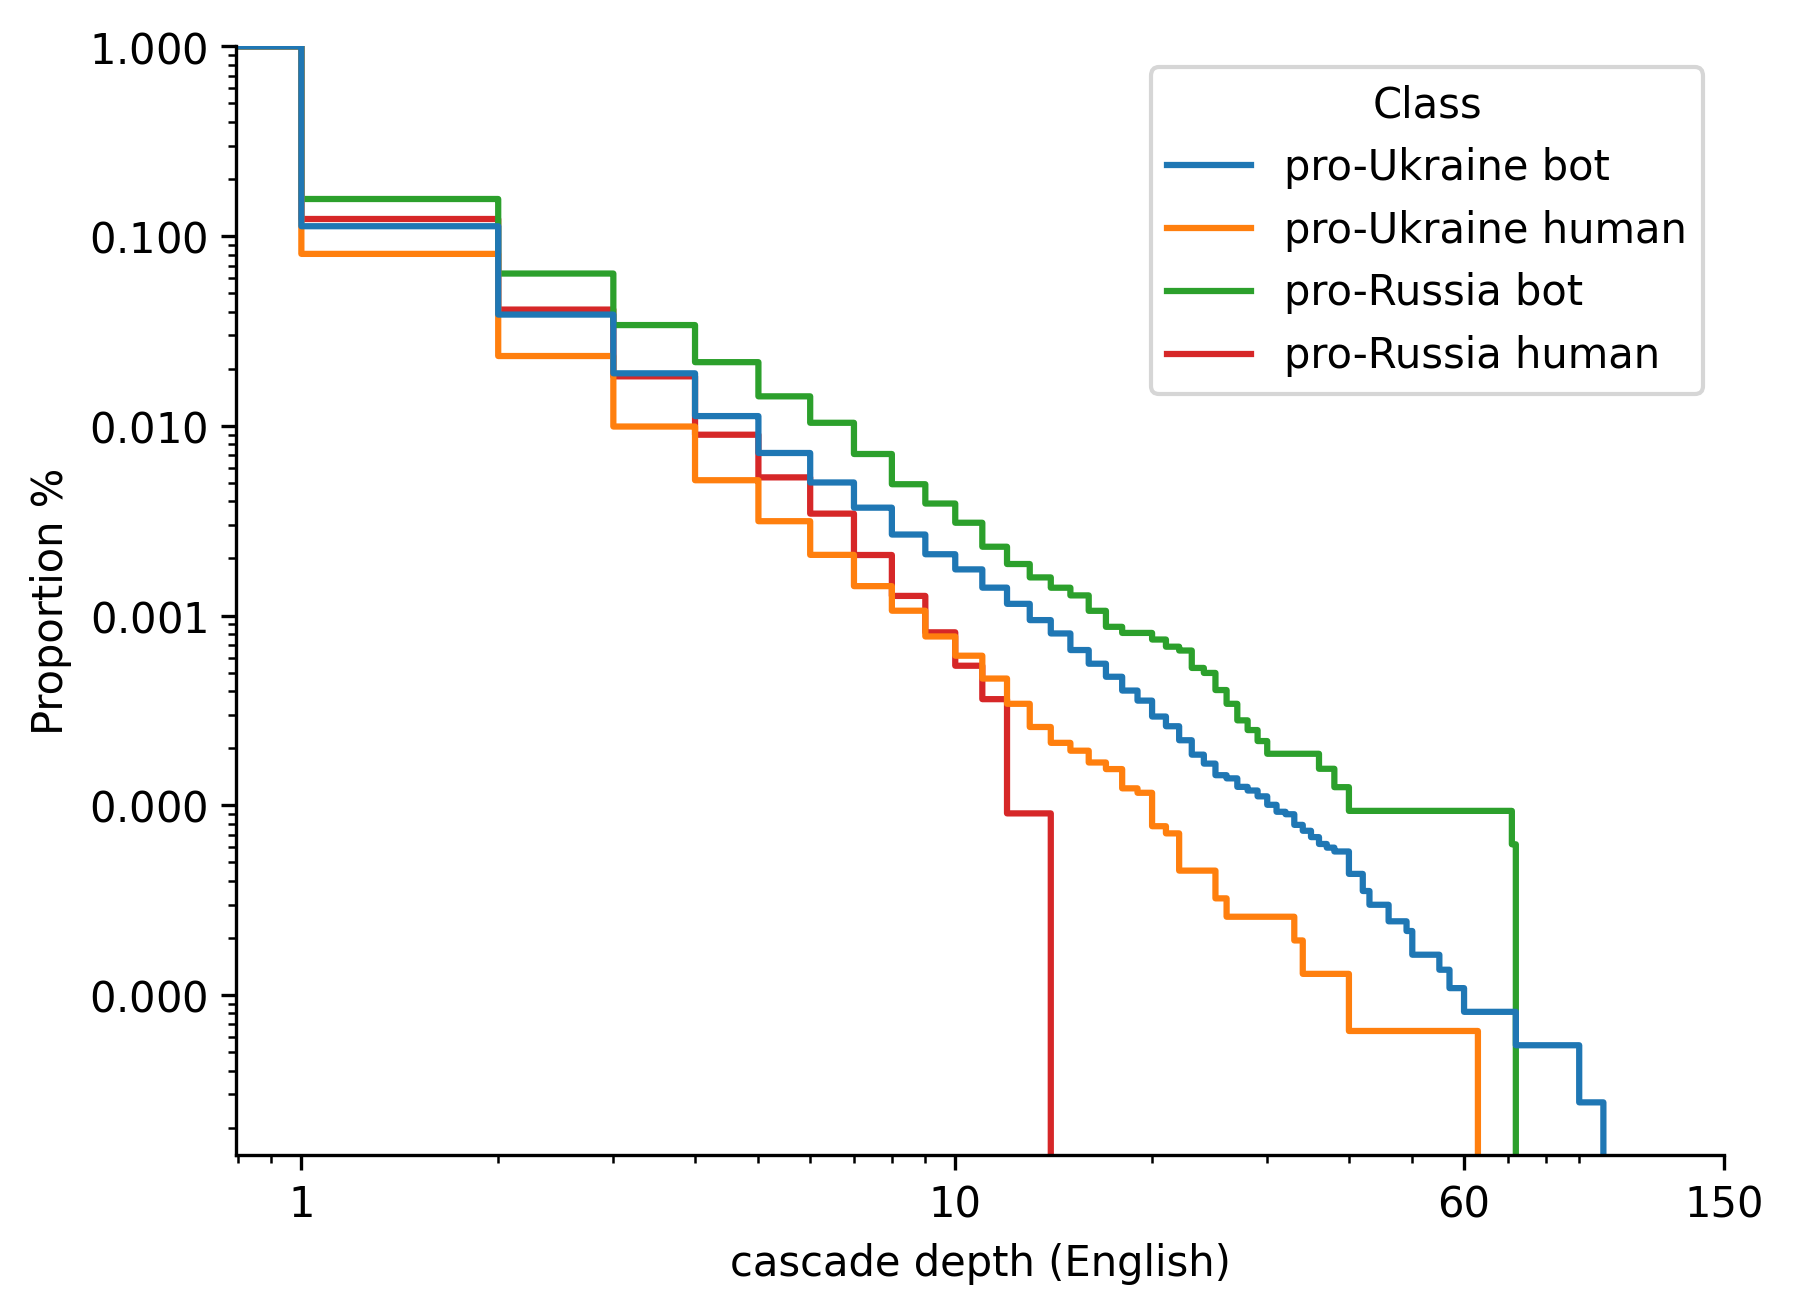

col: ['retweeted_username', 'entities.urls']
col: ['retweeted_username', 'entities.urls']


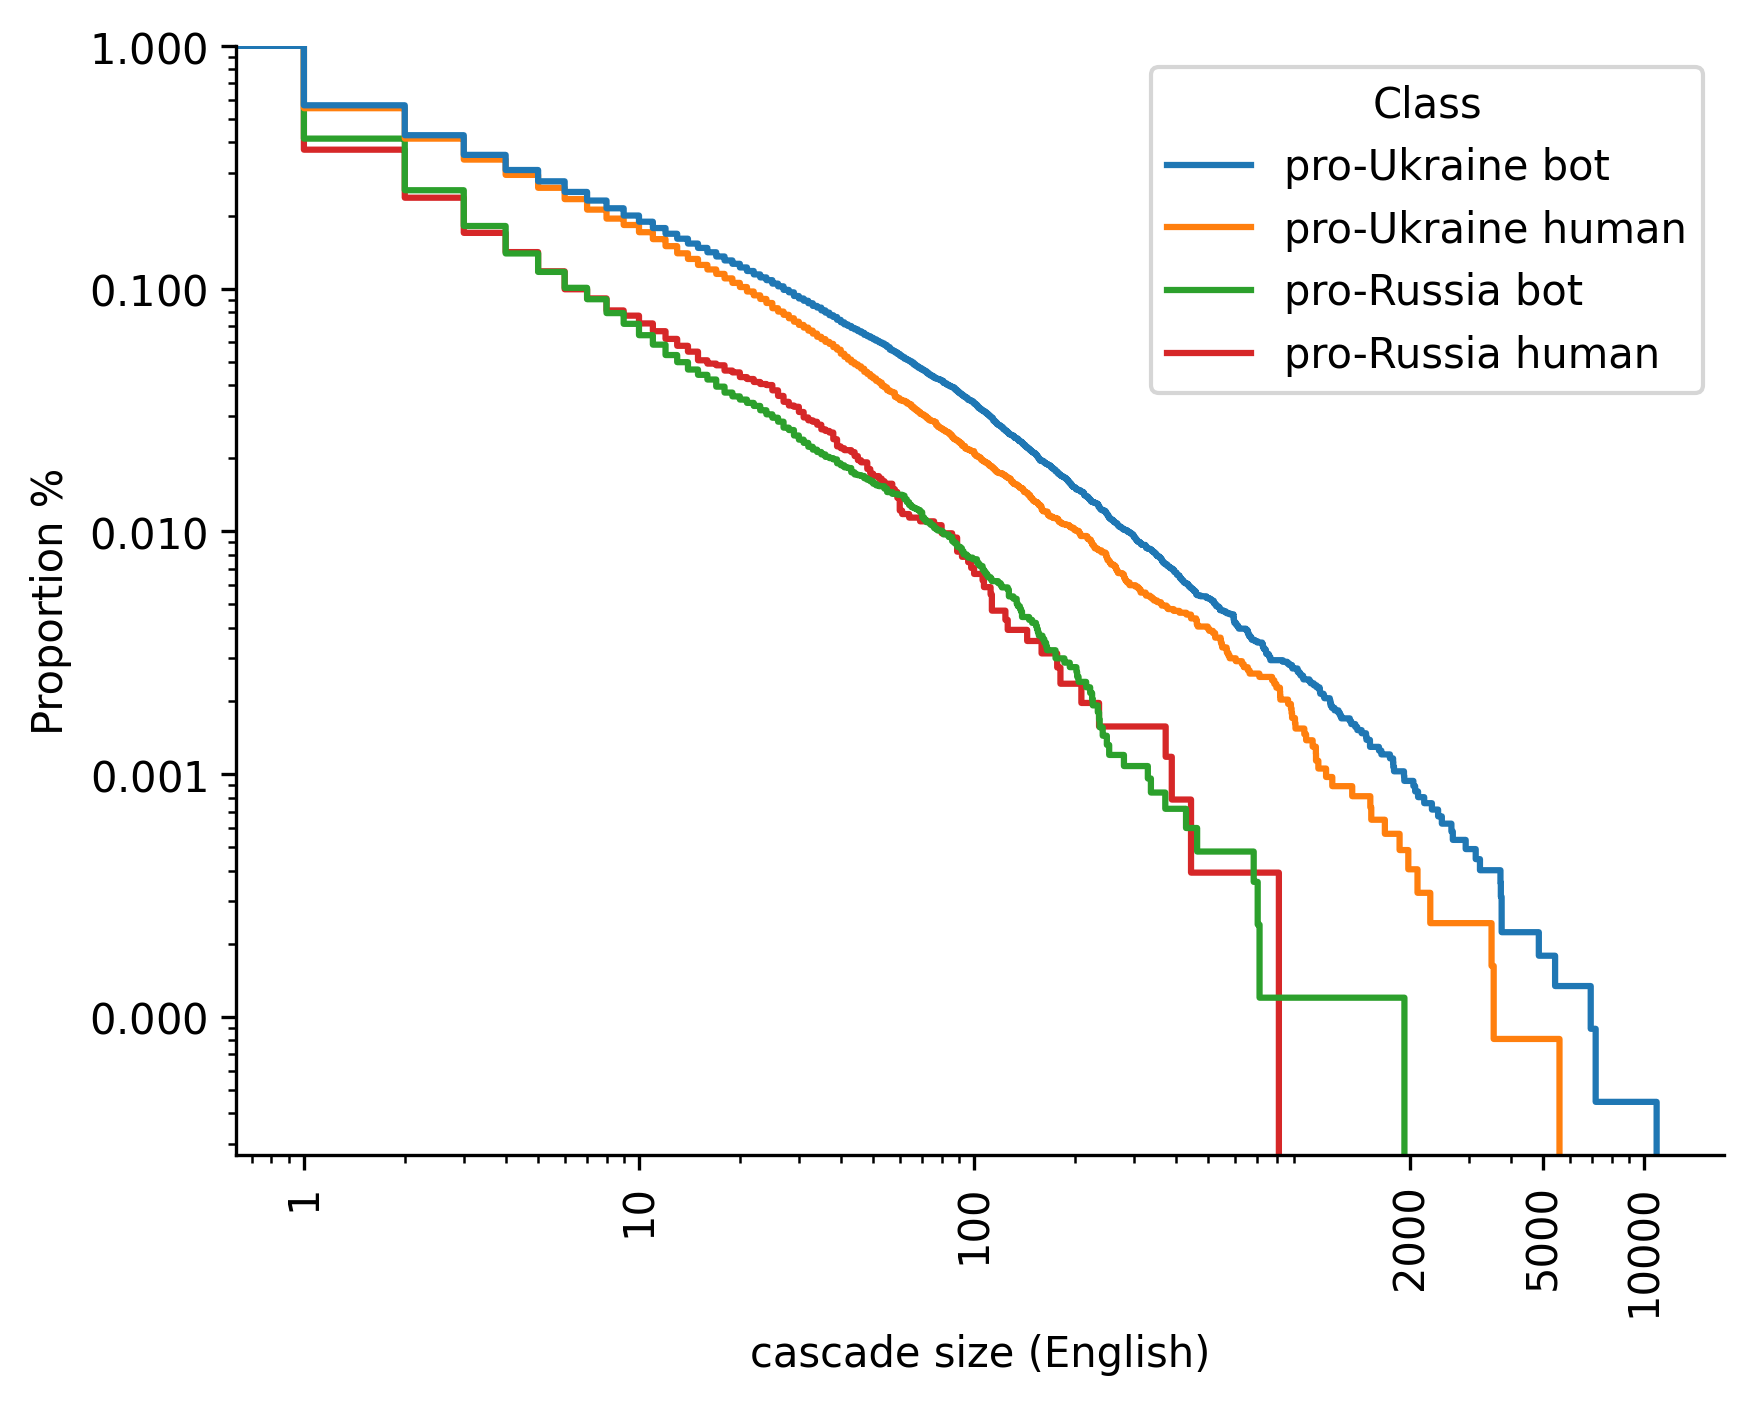

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
for each in ['depth','size']:

    ukdata=dataforCCDF(each,'Ukraine',ukdata_human,ukdata_bot)

    rudata=dataforCCDF(each,'Russia',rudata_human,rudata_bot)

    import matplotlib.pyplot as plt
    import matplotlib
    from matplotlib.ticker import FuncFormatter
    from matplotlib import ticker

    fig, ax = plt.subplots()

    uk_ru_data=pd.concat([ukdata,rudata])
    
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Ukrainehuman','pro-Ukraine human')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Ukrainebot','pro-Ukraine bot')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Russiahuman','pro-Russia human')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Russiabot','pro-Russia bot')
    uk_ru_data=uk_ru_data.rename(columns={'label':'Class'})

    ax=sns.ecdfplot(complementary=True,hue='Class',x='count',data=uk_ru_data,hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
    
    if each =='size':
        ylabels = [0.0001,0.001,0.01,1]
        
        
    elif each == 'depth':
        ylabels = [0.000001,0.001,0.01,1]
        
    ax.set_xticks(ylabels)
    ax.set(yticklabels=ylabels)
    

    ax.set(xscale='log')
    ax.set(yscale='log')

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter) 
    ax.xaxis.set_major_formatter(formatter) 
    if each =='size':
        xlabels=[1,10,100,2000,5000,10000]
        plt.xlabel('cascade size (English)')
        plt.xticks(rotation=90)
        
    elif each == 'depth':
        xlabels=[1,10,60,150]
        plt.xlabel('cascade depth (English)')
    ax.set_xticks(xlabels)
    ax.set(xticklabels=xlabels)

    plt.ylabel("Proportion %")
    sns.despine()
    plt.show()
   

In [ ]:
# Japanese cascade

In [11]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

lang ='Japanese'    

data = pd.read_csv('./data/bucha_jp_ref.csv')
userlst = pd.read_csv("./analysis/japan/ja_class.csv")


data['created_at']=[pd.Timestamp(x) for x in data.created_at]


import numpy as np
data.dropna(subset=['entities.urls'],inplace=True)
data=data[data['entities.urls']!=np.nan]
for each in ['entities.urls']:
    data[each]=data[each].apply(lambda x : x.strip('[]'))
    data[each]=data[each].apply(lambda x : x.strip('\'')) 
    data[each]=data[each].apply(lambda x : x.replace('"','')) 



col: ['author.username', 'retweeted_username']
col: ['author.username', 'retweeted_username']


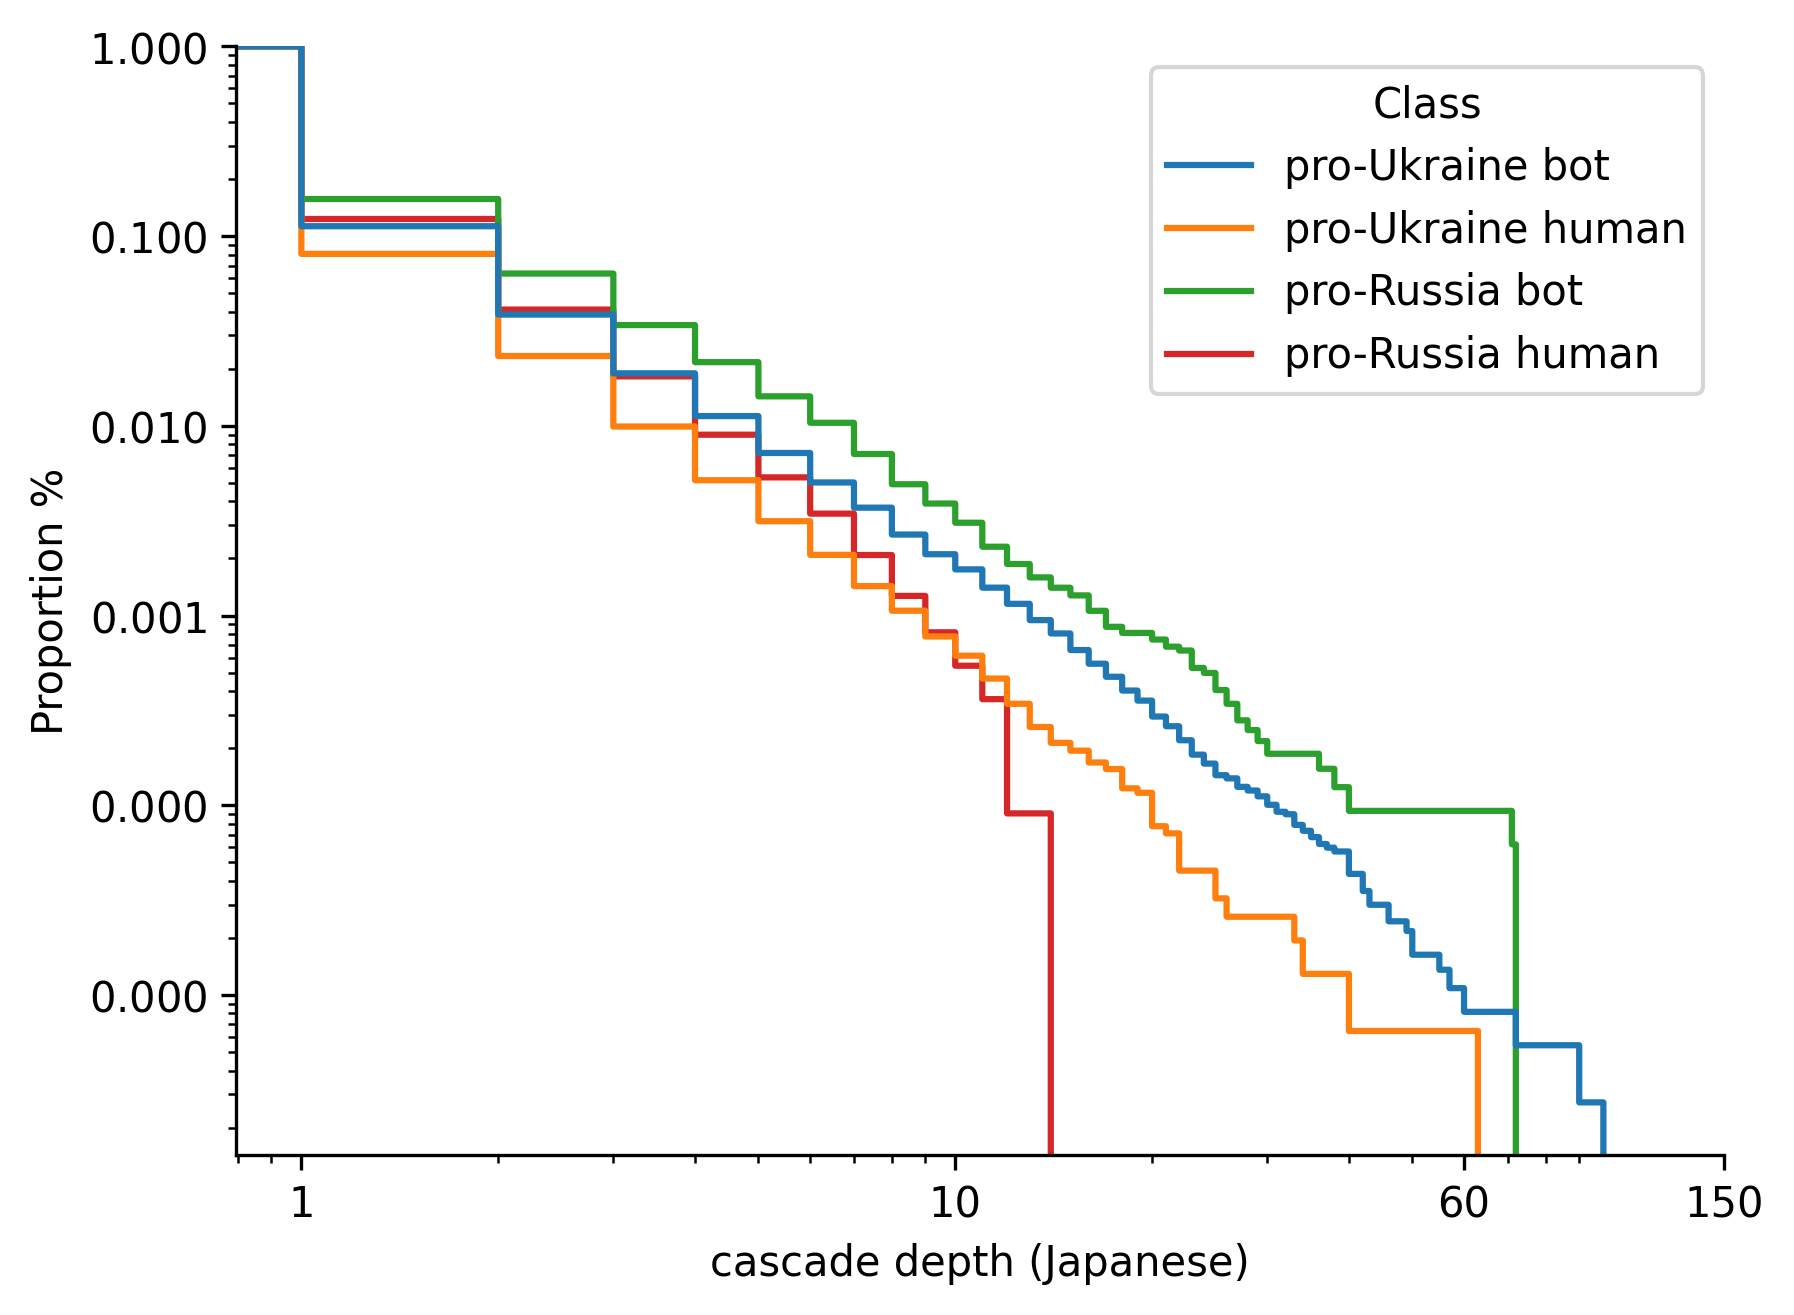

col: ['retweeted_username', 'entities.urls']
col: ['retweeted_username', 'entities.urls']


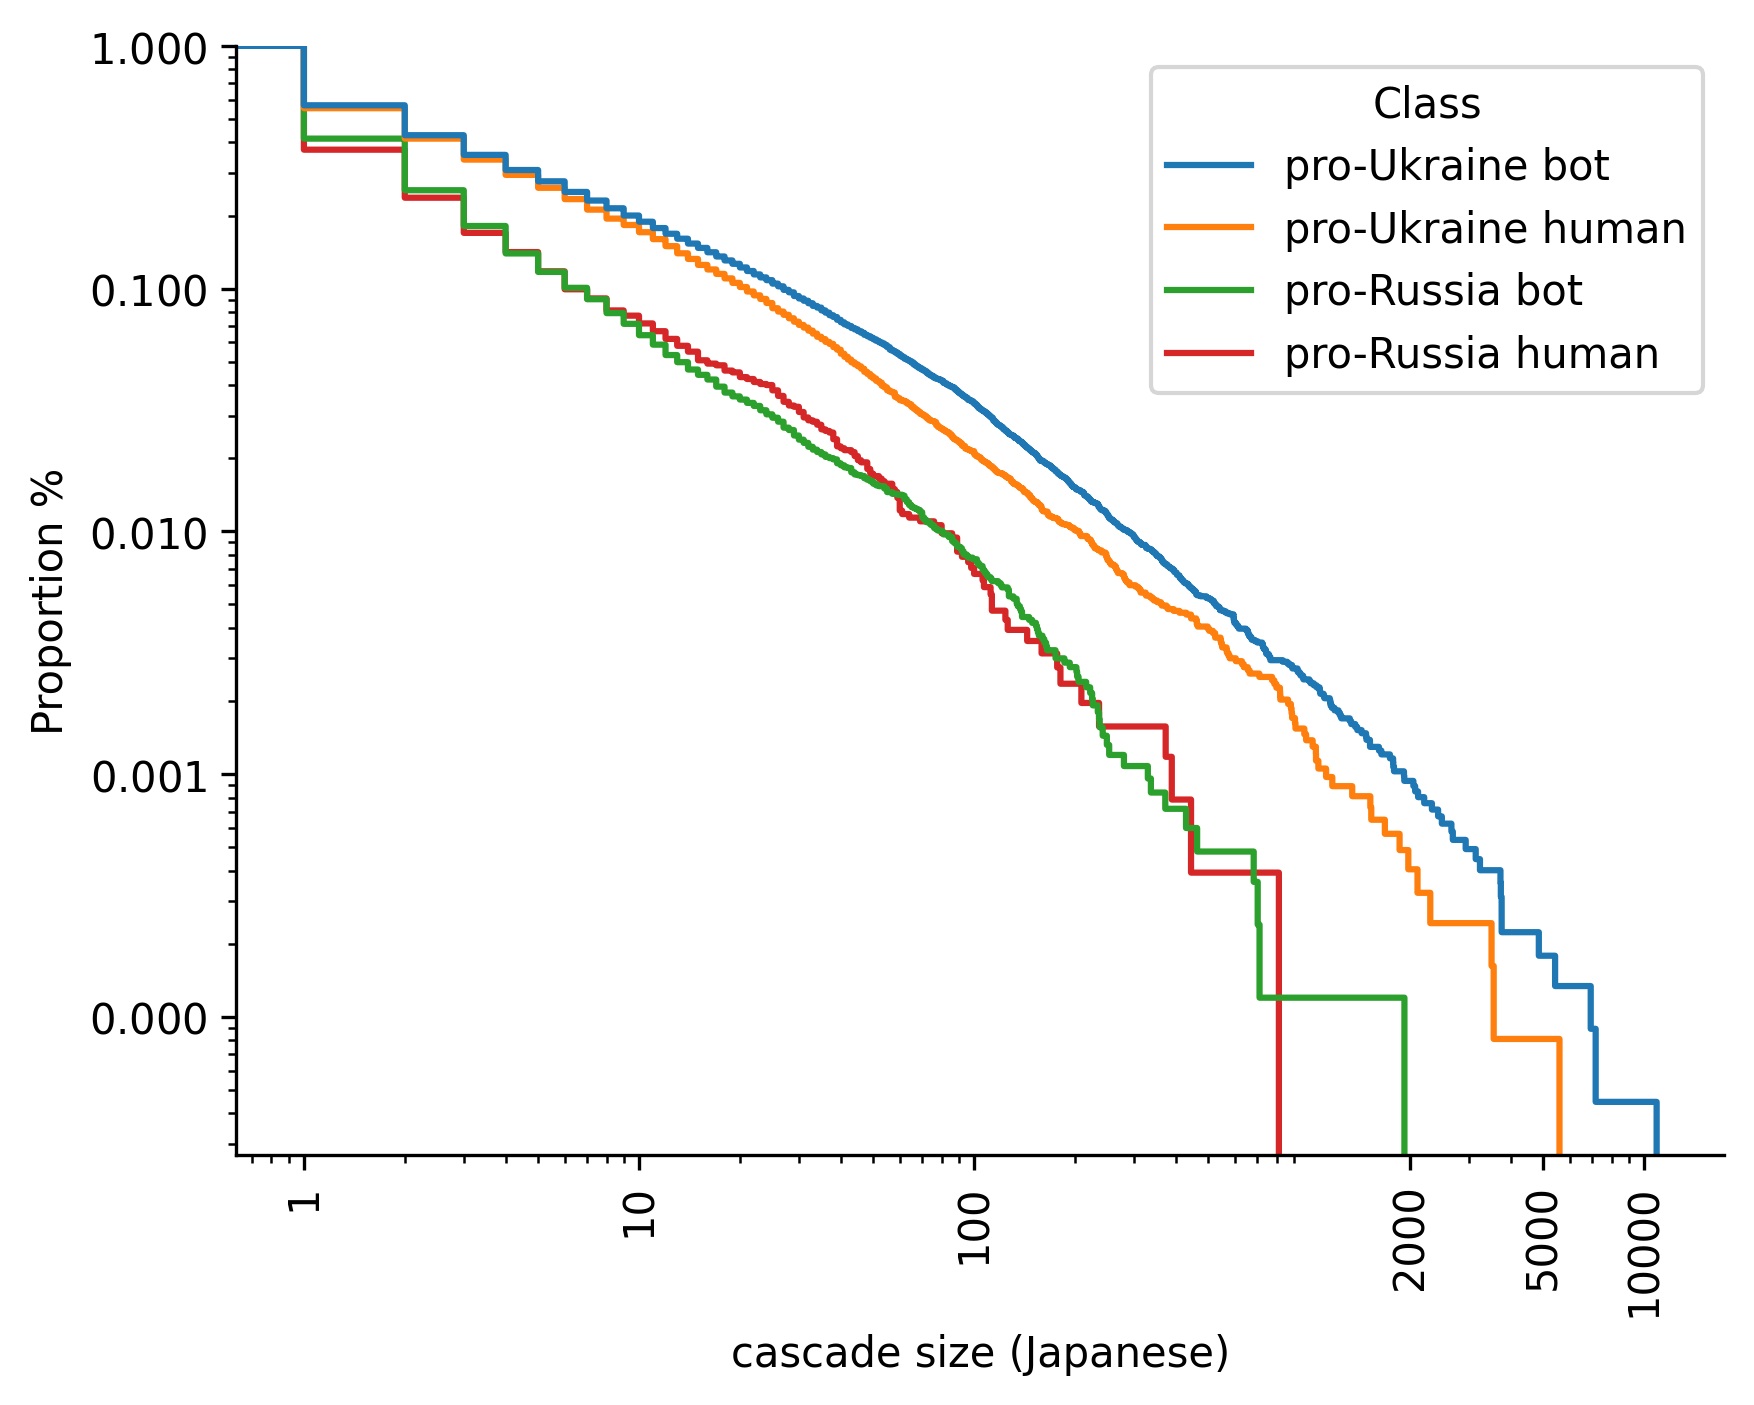

In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
for each in ['depth','size']:

    ukdata=dataforCCDF(each,'Ukraine',ukdata_human,ukdata_bot)

    rudata=dataforCCDF(each,'Russia',rudata_human,rudata_bot)

    import matplotlib.pyplot as plt
    import matplotlib
    from matplotlib.ticker import FuncFormatter
    from matplotlib import ticker

    fig, ax = plt.subplots()

    uk_ru_data=pd.concat([ukdata,rudata])
    
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Ukrainehuman','pro-Ukraine human')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Ukrainebot','pro-Ukraine bot')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Russiahuman','pro-Russia human')
    uk_ru_data['label']=uk_ru_data['label'].str.replace('pro-Russiabot','pro-Russia bot')
    uk_ru_data=uk_ru_data.rename(columns={'label':'Class'})
    ax=sns.ecdfplot(complementary=True,hue='Class',x='count',data=uk_ru_data,hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
    
    if each =='size':
        ylabels = [0.0001,0.001,0.01,1]
        
        
    elif each == 'depth':
        ylabels = [0.000001,0.001,0.01,1]
        
    ax.set_xticks(ylabels)
    ax.set(yticklabels=ylabels)
    

    ax.set(xscale='log')
    ax.set(yscale='log')

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter) 
    ax.xaxis.set_major_formatter(formatter) 
    if each =='size':
        xlabels=[1,10,100,2000,5000,10000]
        plt.xlabel('cascade size (Japanese)')
        plt.xticks(rotation=90)
        
    elif each == 'depth':
        xlabels=[1,10,60,150]
        plt.xlabel('cascade depth (Japanese)')
        
    ax.set_xticks(xlabels)
    ax.set(xticklabels=xlabels)

    plt.ylabel("Proportion %")
    sns.despine()
    plt.show()



# Reddit cascades

(14230, 9)
cascade size lang: de


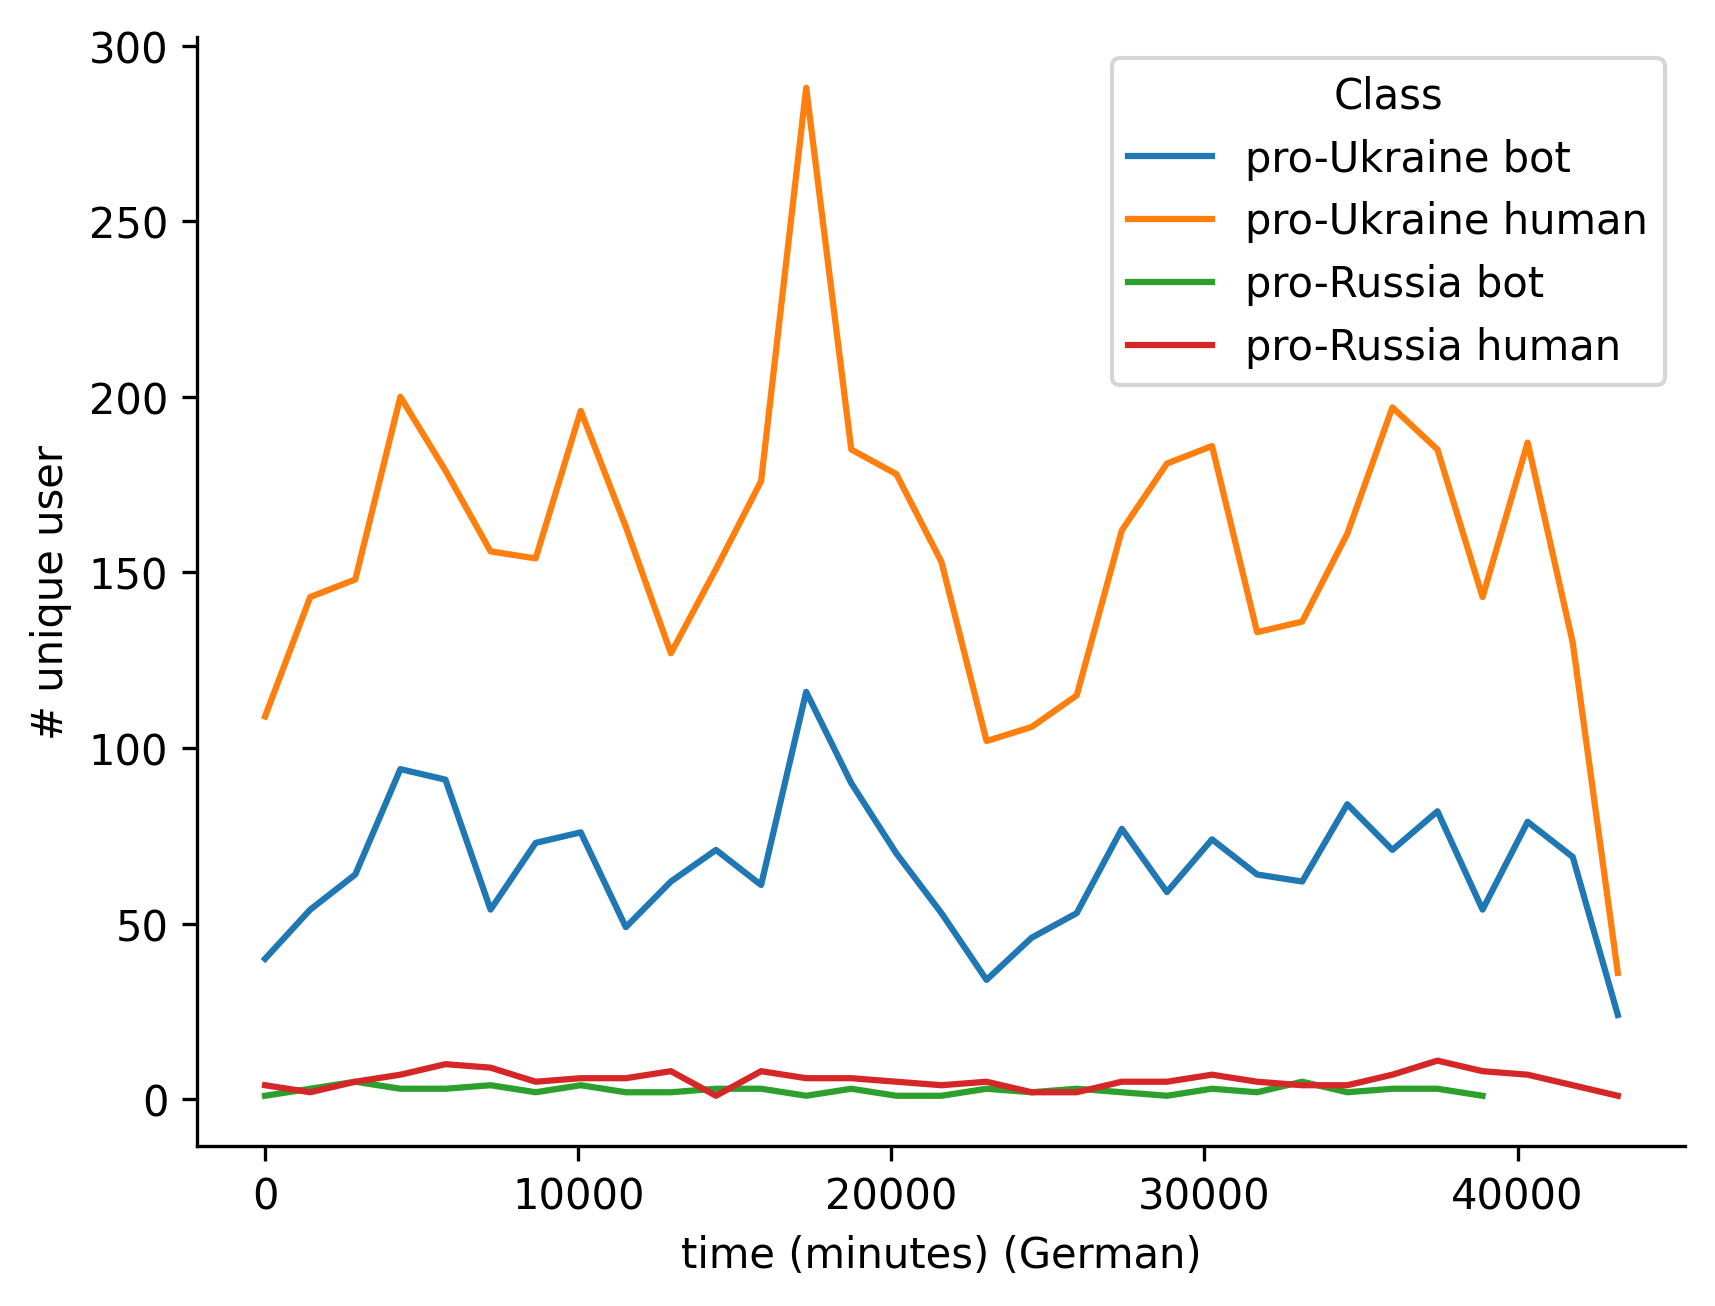

cascade size lang: de


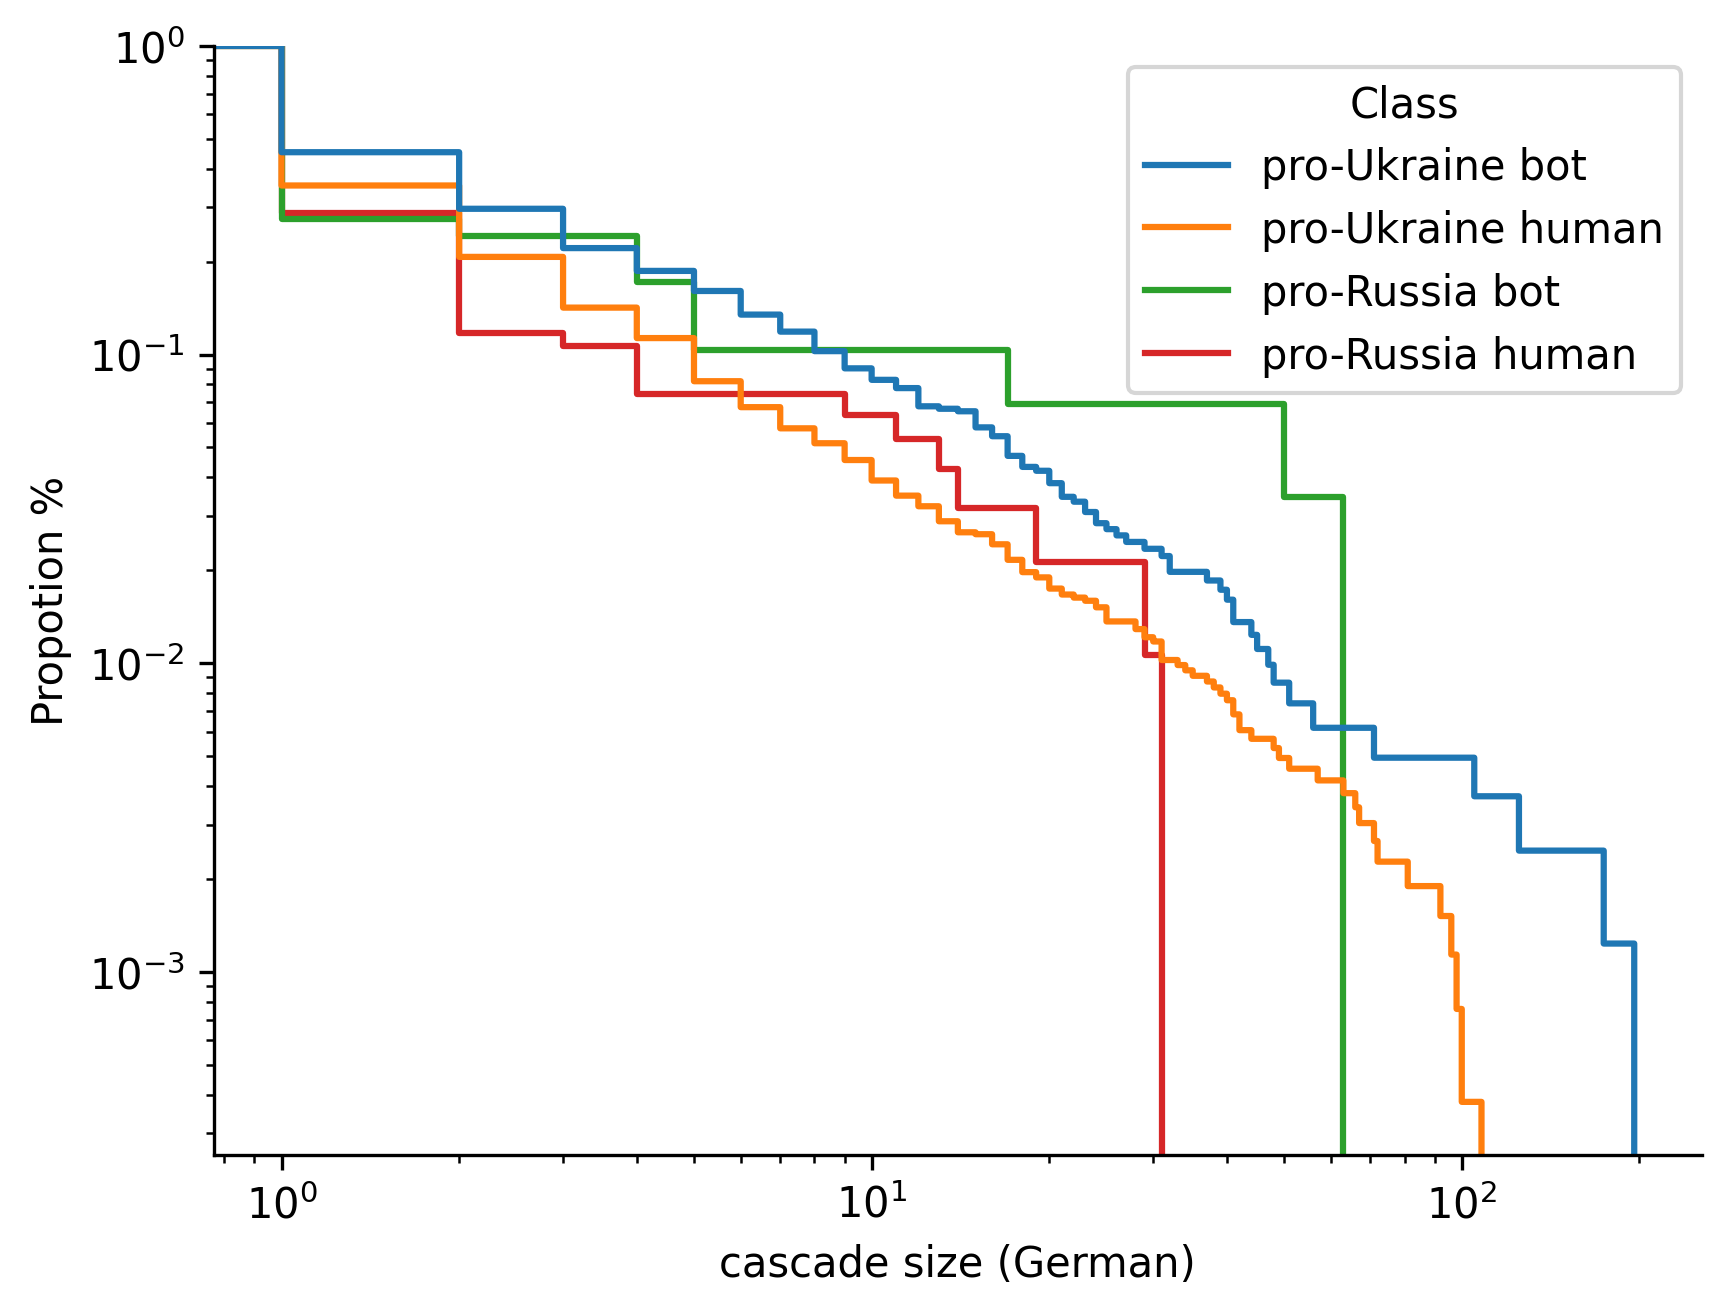

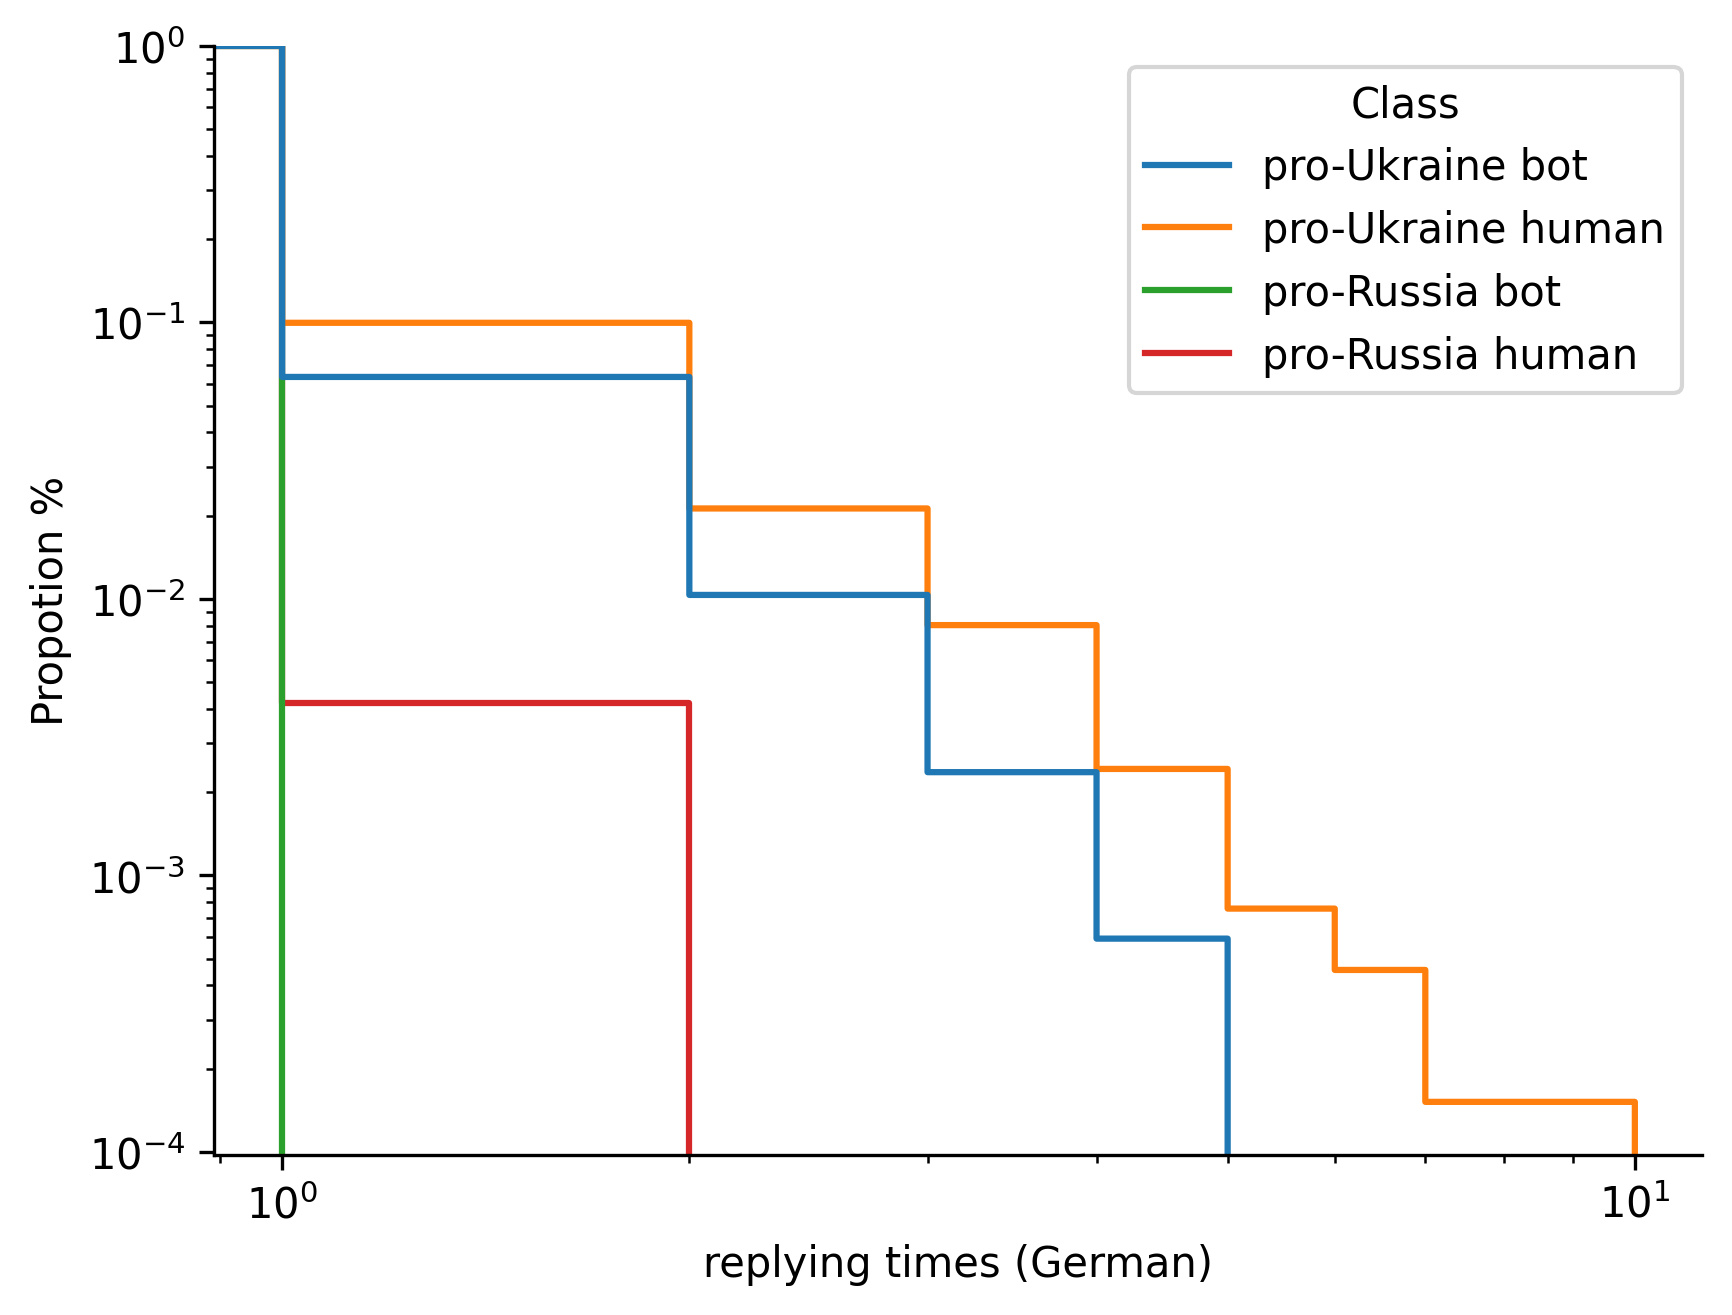

(1047291, 9)
cascade size lang: en


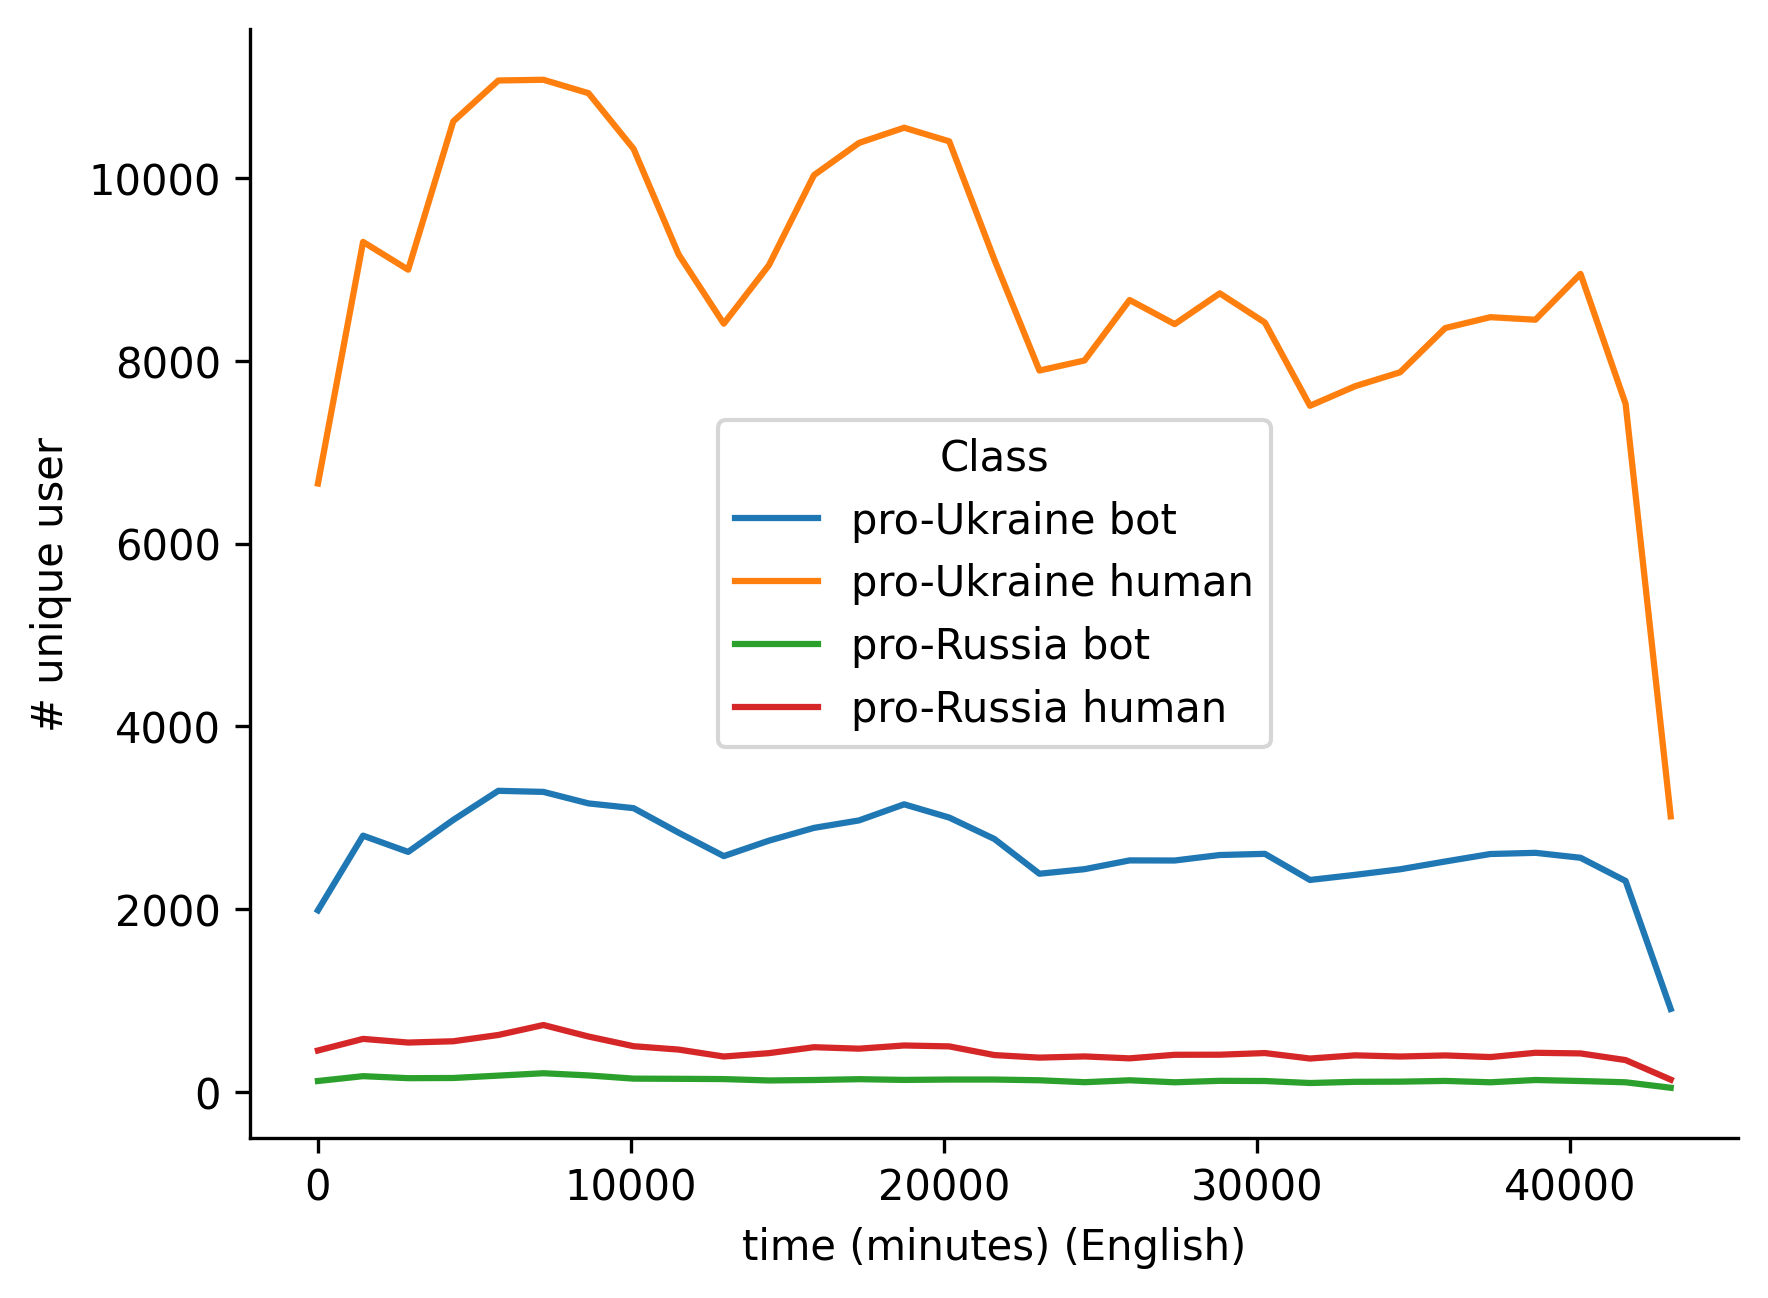

cascade size lang: en


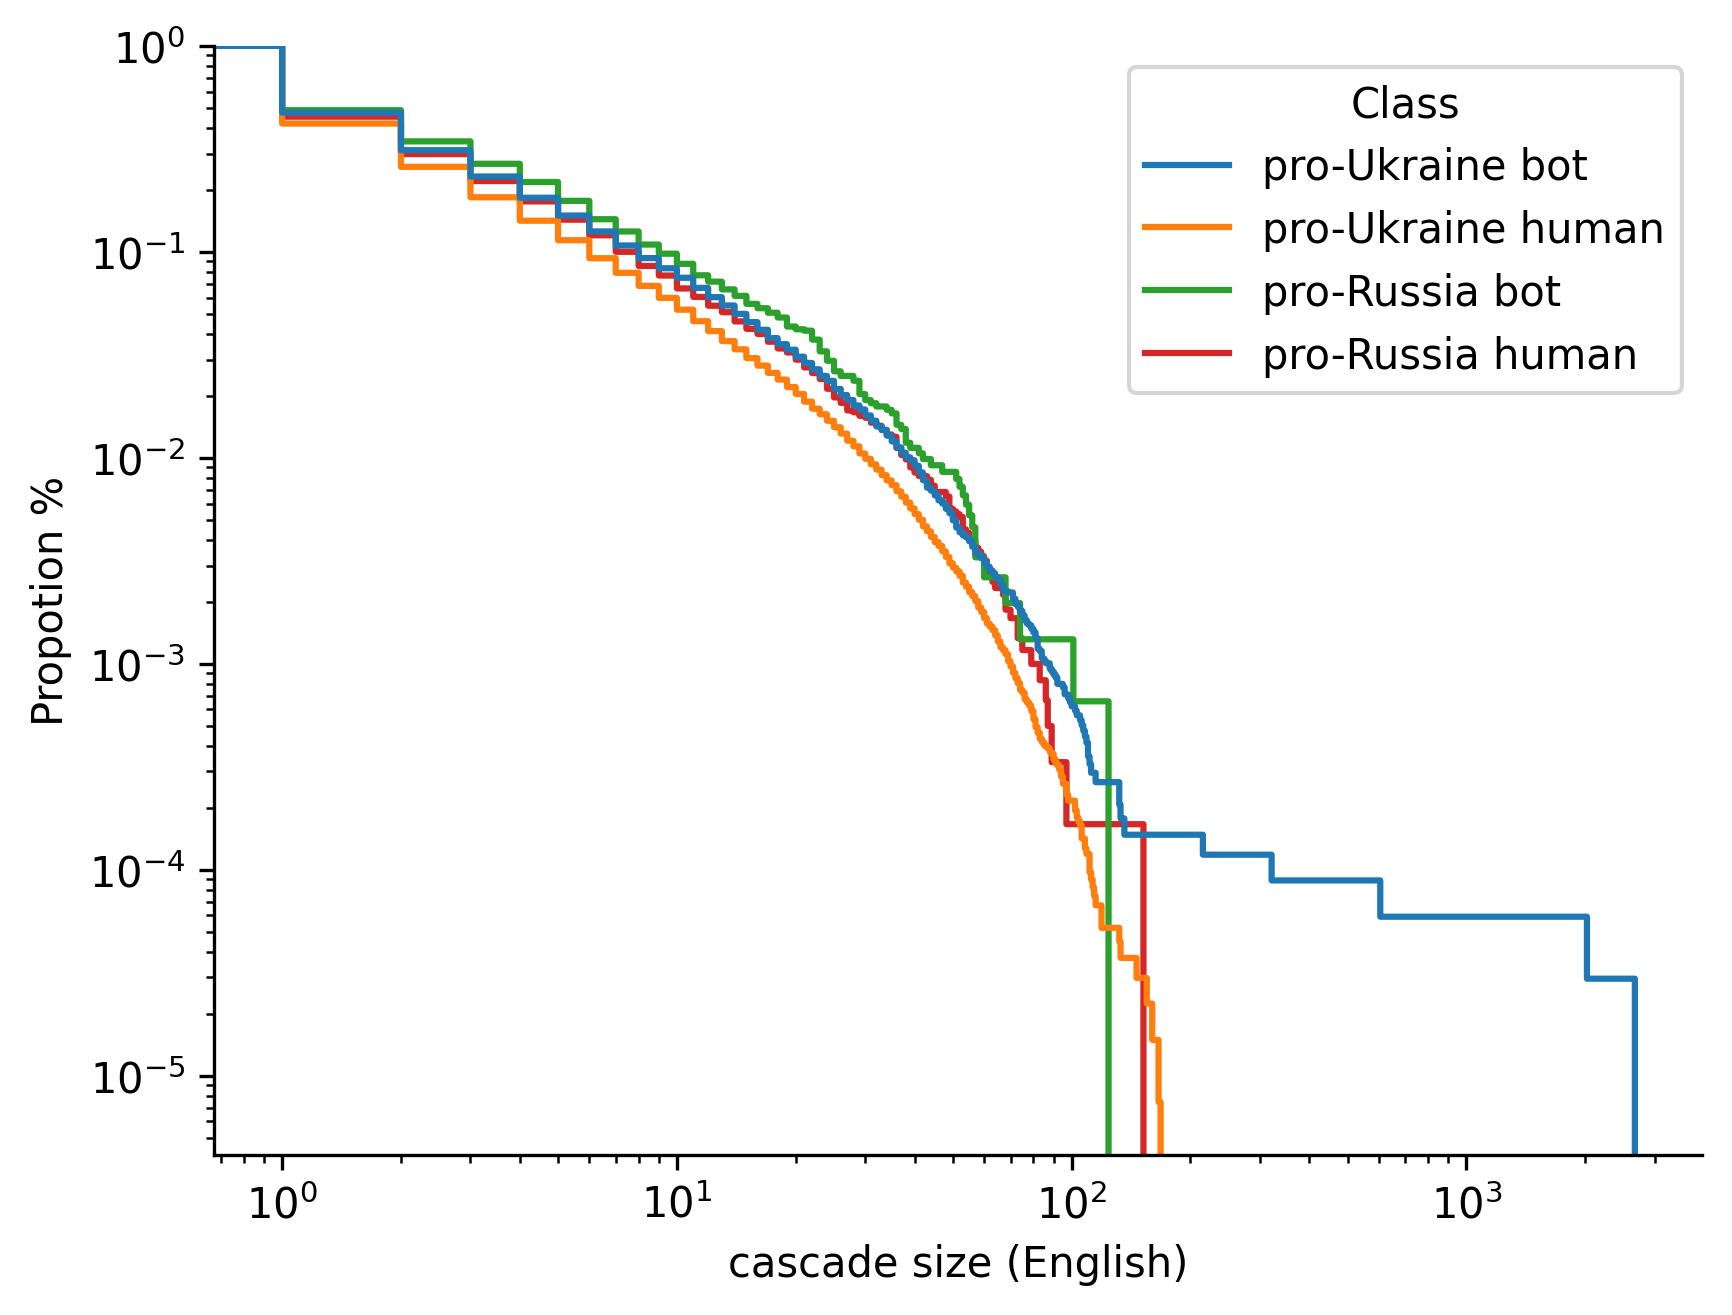

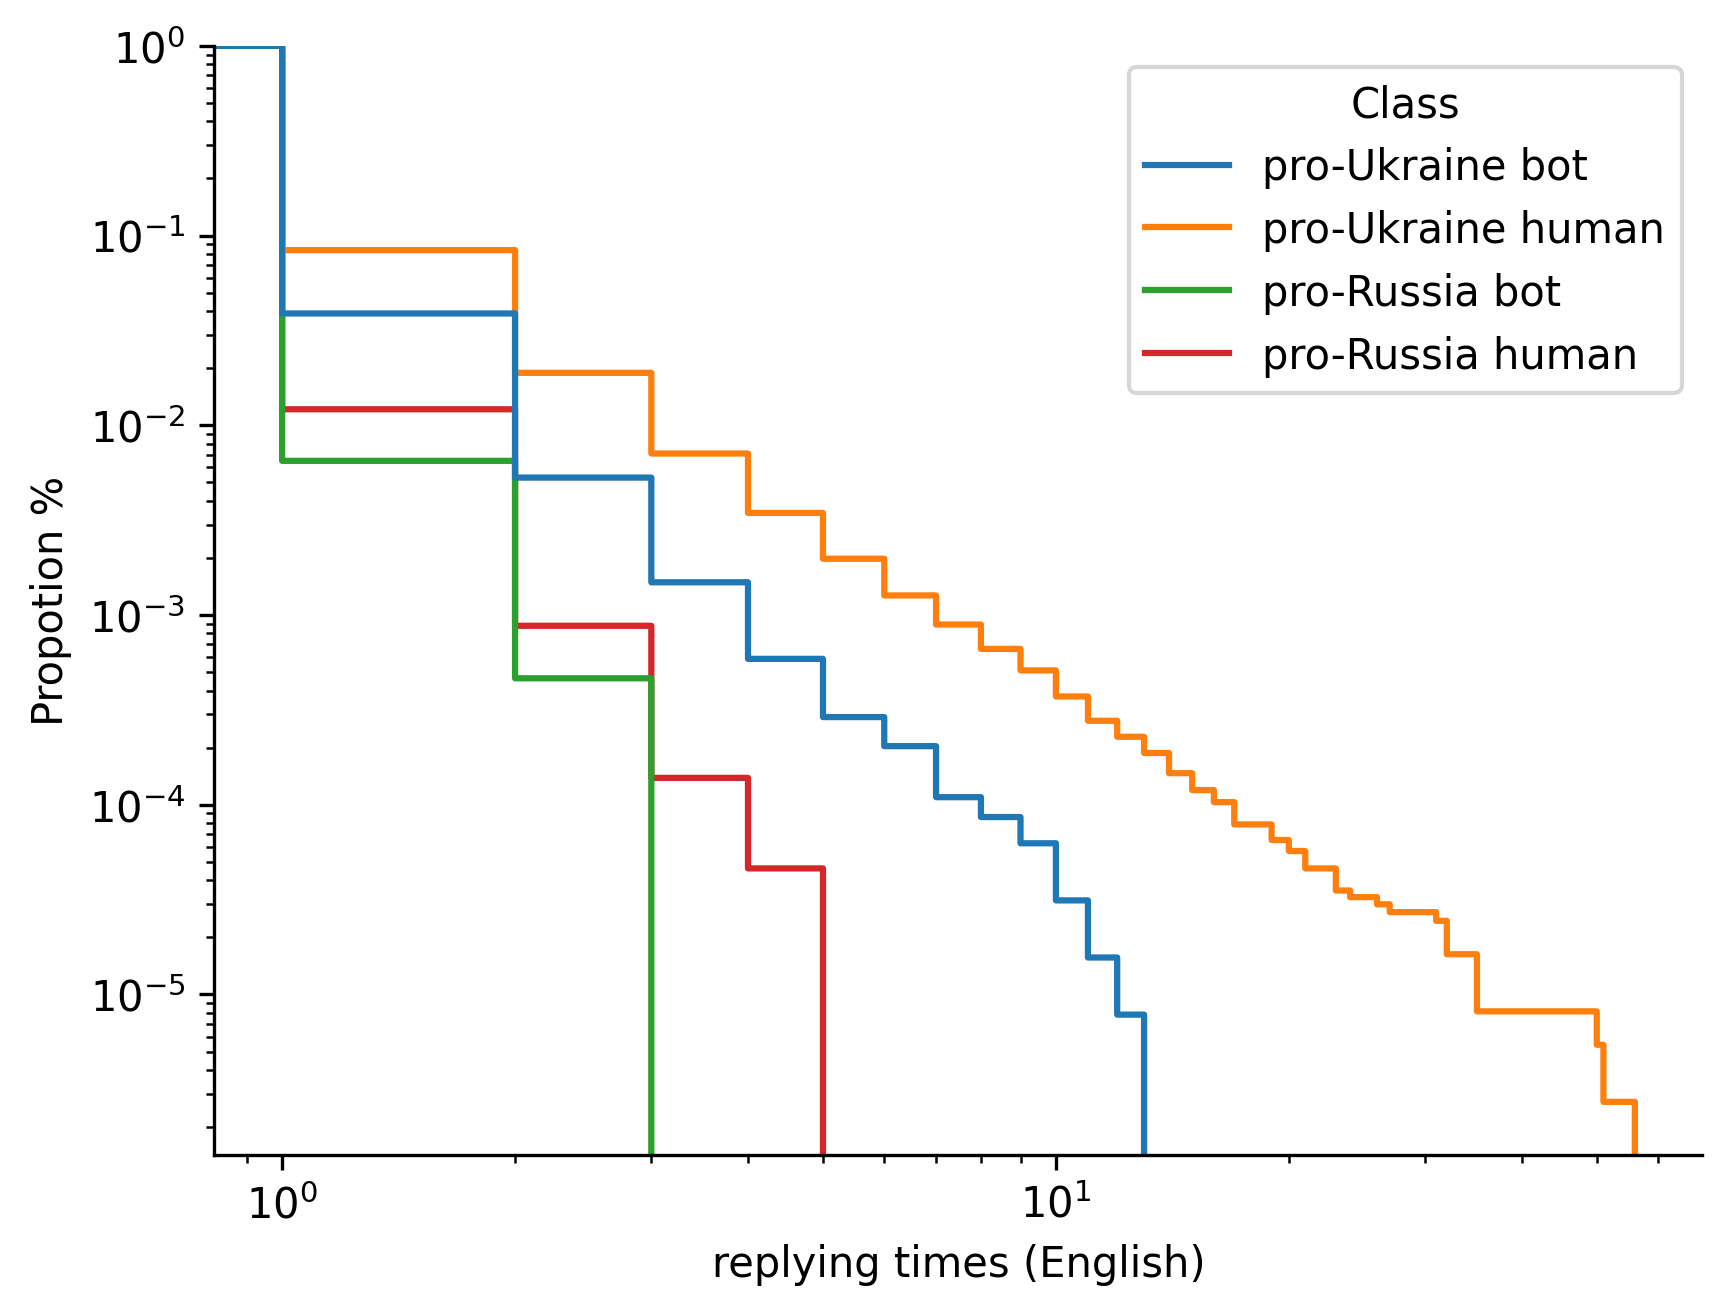

In [13]:
import pandas as pd
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

def stack_plot(_lang,_datatime,_platform):
    mpl.rcParams['figure.dpi'] = 300
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    #_lang='en'
    #_platform='X'
    figN=3
    cat=['pro-Ukraine human', 'pro-Ukraine bot','pro-Russia bot','pro-Russia human']
    y1 = _datatime[_datatime['Class']==cat[0]]['username']
    y2 = _datatime[_datatime['Class']==cat[1]]['username']
    y3 = _datatime[_datatime['Class']==cat[2]]['username']
    y4 = _datatime[_datatime['Class']==cat[3]]['username']
    Y=[y1,y2,y3,y4]
    m1=y1.max()
    m2=y2.max()
    m3=y3.max()
    m4=y4.max()
    M=[m1,m2,m3,m4]
    Zip=list(zip(cat,Y,M))
    
    seq=[m1,m2,m3,m4]
    seq.sort()
    #平均数排序，Class从小到大排序.因为小的后画这样显示在最前面不会被挡住
    D=[]
    for i in range(len(seq)):
        each = seq[i]
        for k in range(len(Zip)):
            each2=Zip[k]
            if each == each2[2]:
                D.append(each2[0])
        
    K=[]#username排序
    for each1 in D:
        for each2 in Zip:
            if each1 ==each2[0]:
                K.append(each2[1])
    #color 排序和PPT一致默认顺序颜色是cat
    pals=plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
    cols=[]
    for each1 in D:
        for each2 in cat:
            if each1==each2:
             
                value=D[D.index(each1)]
                p=cat.index(value)
                print(cols.append(pals[p]))
    
    plt.stackplot(_datatime['time (minutes)'].drop_duplicates().sort_values().to_list(), K,labels=D,colors=cols)#,cat[2],cat[3]])
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    
 
    #get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    
    #specify order of items in legend
    order = [2,3,0,1]
    
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    
    plt.xlabel('time (minutes)')
    plt.ylabel('# unique users')
    plt.savefig(_platform+'_'+_lang+'fig'+str(figN)+'.png',bbox_inches="tight")
    plt.savefig(_platform+'_'+_lang+'fig'+str(figN)+'.tiff',bbox_inches="tight")
    plt.savefig(_platform+'_'+_lang+'fig'+str(figN)+'.pdf',bbox_inches="tight")


casdf=pd.DataFrame()
replydf=pd.DataFrame()
timedf=pd.DataFrame()
platform = 'X'
for lang in 'de','en':
    df1=pd.read_csv('test_Bucha_'+lang+'.csv')
    
    if lang!='en':
        df=pd.read_csv('label_file_'+lang+'.csv')
        df['Class']=df['label_label']+' '+df['class']
    elif lang=='en':
        df=pd.read_csv('test_label_Bucha_'+lang+'.csv')
    
        df['Class']=df['stance']+' '+df['class']
    
    data=pd.read_csv('test_toxity_'+lang+'.csv')
    
    dic_Class=dict(zip(df['author'],df['Class']))
    if lang!='en':
        df1['Class']=df1['author'].map(dic_Class)
        df1['Class']=df1['username'].map(dic_Class)
    
    print(df1.shape)
    
    df1=df1[df1['Class'].notna()]
    
    df1=df1.rename(columns={'created_utc':'timestamp'}) #english does not need this
    df1['timestamp']=df1['timestamp'].astype(int)#english does not need this
    
    df1['timestamp']=df1['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
    
    
    def processing(_data):
    
        _data.sort_values('timestamp',inplace=True)
        
        _data=_data[_data['timestamp'] >= '2022/03/28']
    
    
        _data['timestamp'] =  _data['timestamp'].dt.strftime('%m-%d')
       
    
        return _data
    
    
    df1=processing(df1)
    if lang !='en':
        df1=df1.rename(columns={'author':'username'})#english does not need this
    
    cat=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"]
    datatime=pd.DataFrame()
    for each in cat:
        df1a=df1[df1['Class']==each]
    
        
        if lang!='en':
            df2=df1a.groupby(['body','timestamp','username','parent_id']).nunique().reset_index()#english use message, username,reply_id
        elif lang=='en':
            df2=df1a.groupby(['message','timestamp','username','reply_id']).nunique().reset_index()
            
        df3=df2.groupby(['timestamp']).nunique()['username'].reset_index()
        
        timeseq=[x *24*60 for x in list(range(df3.shape[0]))]
        
        df3['time (minutes)']=timeseq
        df3['Class']=each
    
        datatime=pd.concat([datatime,df3])
        datatime['lang']=lang
        
    timedf=pd.concat([timedf,datatime])
    print('cascade size lang:',lang)
        
    
    import seaborn as sns
    import matplotlib.pyplot as plt

    if lang=='en':
        plt.xlabel("time (minutes) (English)")
    elif lang=='de':
        plt.xlabel("time (minutes) (German)")

 
        
    datatime.to_csv(lang+'_datatime.csv')
    plt.ylabel("# unique user")
    sns.despine() 
    sns.lineplot(data=datatime,x='time (minutes)',y='username',hue='Class')
    plt.savefig(lang+'_date.png',bbox_inches='tight')
    plt.savefig(lang+'_date.pdf',bbox_inches='tight')
    plt.savefig(lang+'_date.jpg',bbox_inches='tight')
    plt.savefig(lang+'_date.tiff',bbox_inches='tight')
    plt.show()
    
    #cscade size
    
    col=['username']
    cat=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"]
    datacas=pd.DataFrame()
    for each in cat:
        df1a=df1[df1['Class']==each]
    
      
        df3=df1a.groupby(col).size().reset_index().sort_values(0)
        
        df3['Class']=each
    
        datacas=pd.concat([datacas,df3])
    datacas['lang']=lang
    casdf=pd.concat([casdf,datacas])
    print('cascade size lang:',lang)
    
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    if lang=='en':
        plt.xlabel("cascade size (English)")
    elif lang=='de':
        plt.xlabel("cascade size (German)")
    plt.ylabel("Propotion %")
    ax=sns.ecdfplot(complementary=True,hue='Class',x=0,data=datacas,hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
    ax.set(xscale='log')
    ax.set(yscale='log')
    sns.despine() 
    plt.savefig(lang+'_cascade.png',bbox_inches='tight')
    plt.savefig(lang+'_cascade.pdf',bbox_inches='tight')
    plt.savefig(lang+'_cascade.jpg',bbox_inches='tight')
    plt.savefig(lang+'_cascade.tiff',bbox_inches='tight')
    plt.show()
    
    
    #replying
    if lang=='en':
        col=['reply_id']
    elif lang=='de':
        col=['parent_id']
    cat=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"]
    datadf=pd.DataFrame()
    for each in cat:
        df1a=df1[df1['Class']==each]

        df3=df1a.groupby(col).size().reset_index().sort_values(0)
      
        df3['Class']=each
    
        datadf=pd.concat([datadf,df3])
    datadf['lang']=lang
    replydf=pd.concat([replydf,datadf])
    
    import seaborn as sns
    import matplotlib.pyplot as plt
 
    if lang=='en':
        plt.xlabel("replying times (English)")
    elif lang=='de':
        plt.xlabel("replying times (German)")
    plt.ylabel("Propotion %")
    ax=sns.ecdfplot(complementary=True,hue='Class',x=0,data=datadf,hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
    ax.set(xscale='log')
    ax.set(yscale='log')
    sns.despine() 
    
    plt.show()

# Japanese Daily dynamics of X

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
cat=2

if  cat == 1:
    lang ='English'
    data = pd.read_csv('./data/bucha_ref.csv')
    userlst=pd.read_csv('./analysis/english_bucha_class.csv')
elif cat == 2: 
    lang ='Japanese'    

    data = pd.read_csv('./data/bucha_jp_ref.csv')
    userlst = pd.read_csv("./analysis/japan/ja_class.csv")




data['created_at']=[pd.Timestamp(x) for x in data.created_at]

#data['referenced_tweets.retweeted.id']=data['referenced_tweets.retweeted.id'].apply(lambda x: '{:.0f}'.format(x))


#data['author.pinned_tweet_id']=data['author.pinned_tweet_id'].apply(lambda x: '{:.0f}'.format(x))

import numpy as np
data.dropna(subset=['entities.urls'],inplace=True)
data=data[data['entities.urls']!=np.nan]
for each in ['entities.urls']:
    data[each]=data[each].apply(lambda x : x.strip('[]'))
    data[each]=data[each].apply(lambda x : x.strip('\'')) 
    data[each]=data[each].apply(lambda x : x.replace('"','')) 




import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter


def scientific(x, pos):
   
    return '2E' % x


pro_russia_human=userlst[userlst['class']=='pro-Russia human']['Id']
pro_russia_bot=userlst[userlst['class']=='pro-Russia bot']['Id']
pro_ukraine_human=userlst[userlst['class']=='pro-Ukraine human']['Id']
pro_ukraine_bot=userlst[userlst['class']=='pro-Ukraine bot']['Id']

ukdata_human = data[(data['author.username'].isin(pro_ukraine_human))]
ukdata_bot = data[(data['author.username'].isin(pro_ukraine_bot))]

rudata_human=data[(data['author.username'].isin(pro_russia_human))]
rudata_bot=data[(data['author.username'].isin(pro_russia_bot))]


def processing(_data):

    _data.sort_values('created_at',inplace=True)
    
    _data=_data[_data['created_at'] >= '2022/03/28']

   

    _data['created_at'] =  _data['created_at'].dt.strftime('%m-%d')
    
    return _data



ukdata_human = processing(ukdata_human)
ukdata_bot = processing(ukdata_bot)
rudata_human = processing(rudata_human)
rudata_bot = processing(rudata_bot)


   


In [15]:
def uniqueuser(country,_data_human,_data_bot):
    '''
    country:'Ukraine' or 'Russia'
    temp1 must be human
    temp2 must be bot
    '''
    _df=_data_human[_data_human['entities.urls'].duplicated()]

    t1=_df.groupby(['created_at','retweeted_username','entities.urls','author.username']).nunique().reset_index()

    t1=t1.groupby(['created_at']).nunique()['author.username'].reset_index()

    timeseq=[x *24*60 for x in list(range(t1.shape[0]))]

    t1['time (minutes)']=timeseq

    t1['class']='pro-'+country+ ' human'
    
    
    _df=_data_bot[_data_bot['entities.urls'].duplicated()]

    t2=_df.groupby(['created_at','retweeted_username','entities.urls','author.username']).nunique().reset_index()

    t2=t2.groupby(['created_at']).nunique()['author.username'].reset_index()

    timeseq=[x *24*60 for x in list(range(t1.shape[0]))]

    t2['time (minutes)']=timeseq

    t2['class']='pro-'+country+ ' bot'
    
    
    temp=pd.concat([t1,t2])

    return temp


In [16]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ukdata=uniqueuser('Ukraine',ukdata_human,ukdata_bot)

rudata=uniqueuser('Russia',rudata_human,rudata_bot)

uk_ru_data=pd.concat([ukdata,rudata])


None
None
None
None


Text(0, 0.5, '# unique users')

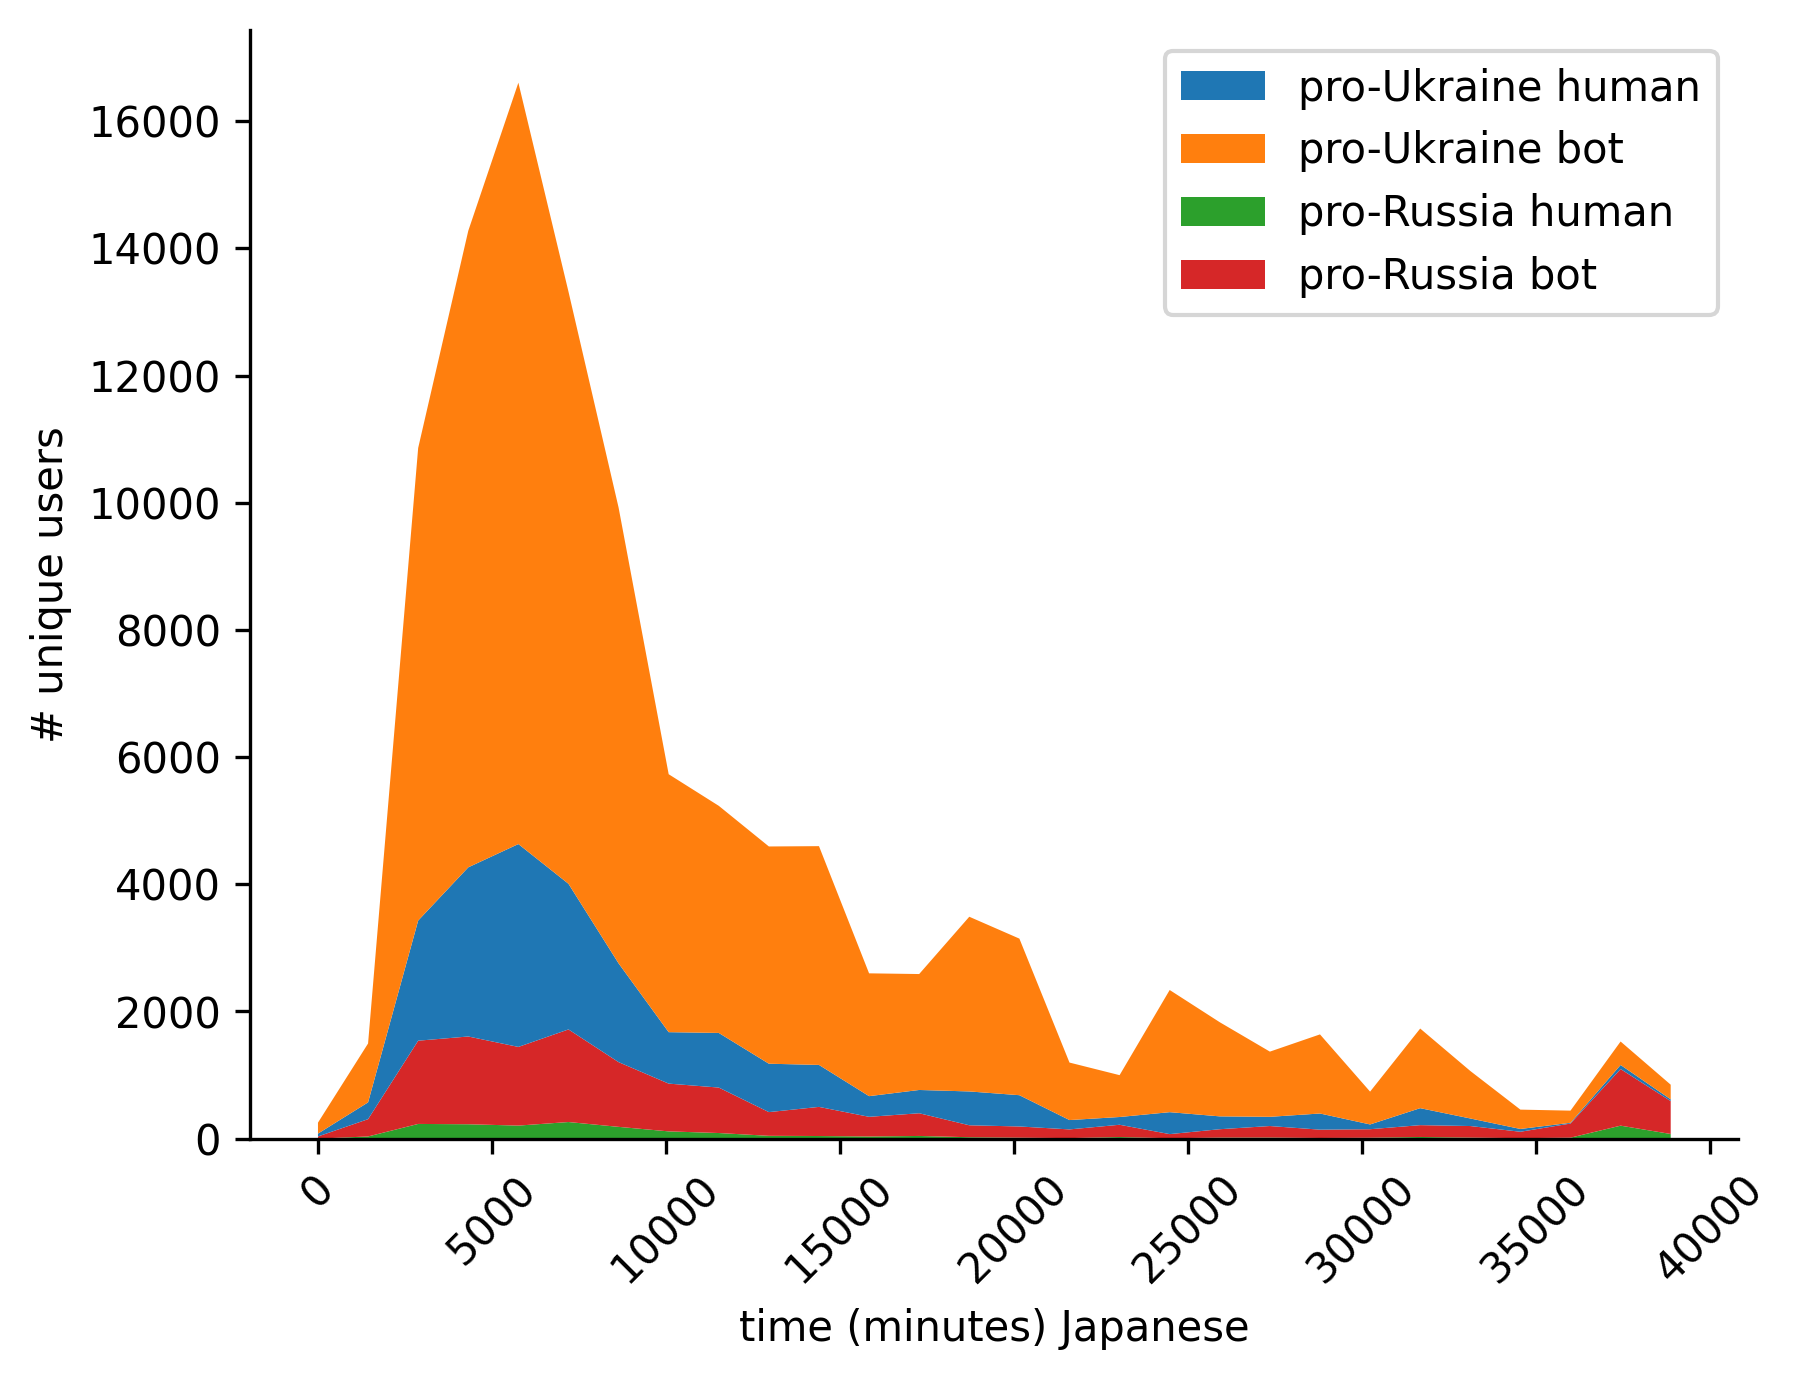

In [17]:
# library
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
import matplotlib.pyplot as plt
datatime=uk_ru_data
datatime=datatime.rename(columns={'class':'Class'})
datatime=datatime.rename(columns={'author.username':'username'})

#lang='ja'
platform='X'
figN=4
cat=['pro-Ukraine human', 'pro-Ukraine bot','pro-Russia bot','pro-Russia human']
y1 =  datatime[datatime['Class']==cat[0]]['username']
y2 =  datatime[datatime['Class']==cat[1]]['username']
y3 = datatime[datatime['Class']==cat[2]]['username']
y4 = datatime[datatime['Class']==cat[3]]['username']
Y=[y1,y2,y3,y4]
m1=y1.max()
m2=y2.max()
m3=y3.max()
m4=y4.max()
M=[m1,m2,m3,m4]
Zip=list(zip(cat,Y,M))

seq=[m1,m2,m3,m4]
seq.sort()
#Average sorting. Class sorting from small to large. Because the small ones are displayed at the front and will not be blocked.
D=[]
for i in range(len(seq)):
    each = seq[i]
    for k in range(len(Zip)):
        each2=Zip[k]
        if each == each2[2]:
            D.append(each2[0])
    
K=[]#username sorting
for each1 in D:
    for each2 in Zip:
        if each1 ==each2[0]:
            K.append(each2[1])

pals=plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
cols=[]
for each1 in D:
    for each2 in cat:
        if each1==each2:
         
            value=D[D.index(each1)]
            p=cat.index(value)
            print(cols.append(pals[p]))
            
cols=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cols=[cols[2],cols[3],cols[0],cols[1]]

K=[x.reset_index(drop=True)[:28] for x in K]
plt.stackplot(datatime['time (minutes)'].drop_duplicates()[:28].sort_values().to_list(), K,labels=D,colors=cols)#,cat[2],cat[3]])
plt.xticks(rotation=45)
plt.legend(loc='upper right')


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,3,0,1]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.xlabel('time (minutes) Japanese')
plt.ylabel('# unique users')

# English Daily dynamics of X 

In [18]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
cat=1

if  cat == 1:
    lang ='English'
    data = pd.read_csv('./data/bucha_ref.csv')
    userlst=pd.read_csv('./analysis/english_bucha_class.csv')
elif cat == 2: 
    lang ='Japanese'    

    data = pd.read_csv('./data/bucha_jp_ref.csv')
    userlst = pd.read_csv("./analysis/japan/ja_class.csv")




data['created_at']=[pd.Timestamp(x) for x in data.created_at]


import numpy as np
data.dropna(subset=['entities.urls'],inplace=True)
data=data[data['entities.urls']!=np.nan]
for each in ['entities.urls']:
    data[each]=data[each].apply(lambda x : x.strip('[]'))
    data[each]=data[each].apply(lambda x : x.strip('\'')) 
    data[each]=data[each].apply(lambda x : x.replace('"','')) 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter


def scientific(x, pos):
   
    return '2E' % x


pro_russia_human=userlst[userlst['class']=='pro-Russia human']['Id']
pro_russia_bot=userlst[userlst['class']=='pro-Russia bot']['Id']
pro_ukraine_human=userlst[userlst['class']=='pro-Ukraine human']['Id']
pro_ukraine_bot=userlst[userlst['class']=='pro-Ukraine bot']['Id']

ukdata_human = data[(data['author.username'].isin(pro_ukraine_human))]
ukdata_bot = data[(data['author.username'].isin(pro_ukraine_bot))]

rudata_human=data[(data['author.username'].isin(pro_russia_human))]
rudata_bot=data[(data['author.username'].isin(pro_russia_bot))]


def processing(_data):

    _data.sort_values('created_at',inplace=True)
    
    _data=_data[_data['created_at'] >= '2022/03/28']

   

    _data['created_at'] =  _data['created_at'].dt.strftime('%m-%d')
  
    return _data



ukdata_human = processing(ukdata_human)
ukdata_bot = processing(ukdata_bot)
rudata_human = processing(rudata_human)
rudata_bot = processing(rudata_bot)


   
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ukdata=uniqueuser('Ukraine',ukdata_human,ukdata_bot)

rudata=uniqueuser('Russia',rudata_human,rudata_bot)


uk_ru_data=pd.concat([ukdata,rudata])

None
None
None
None


Text(0, 0.5, '# unique users')

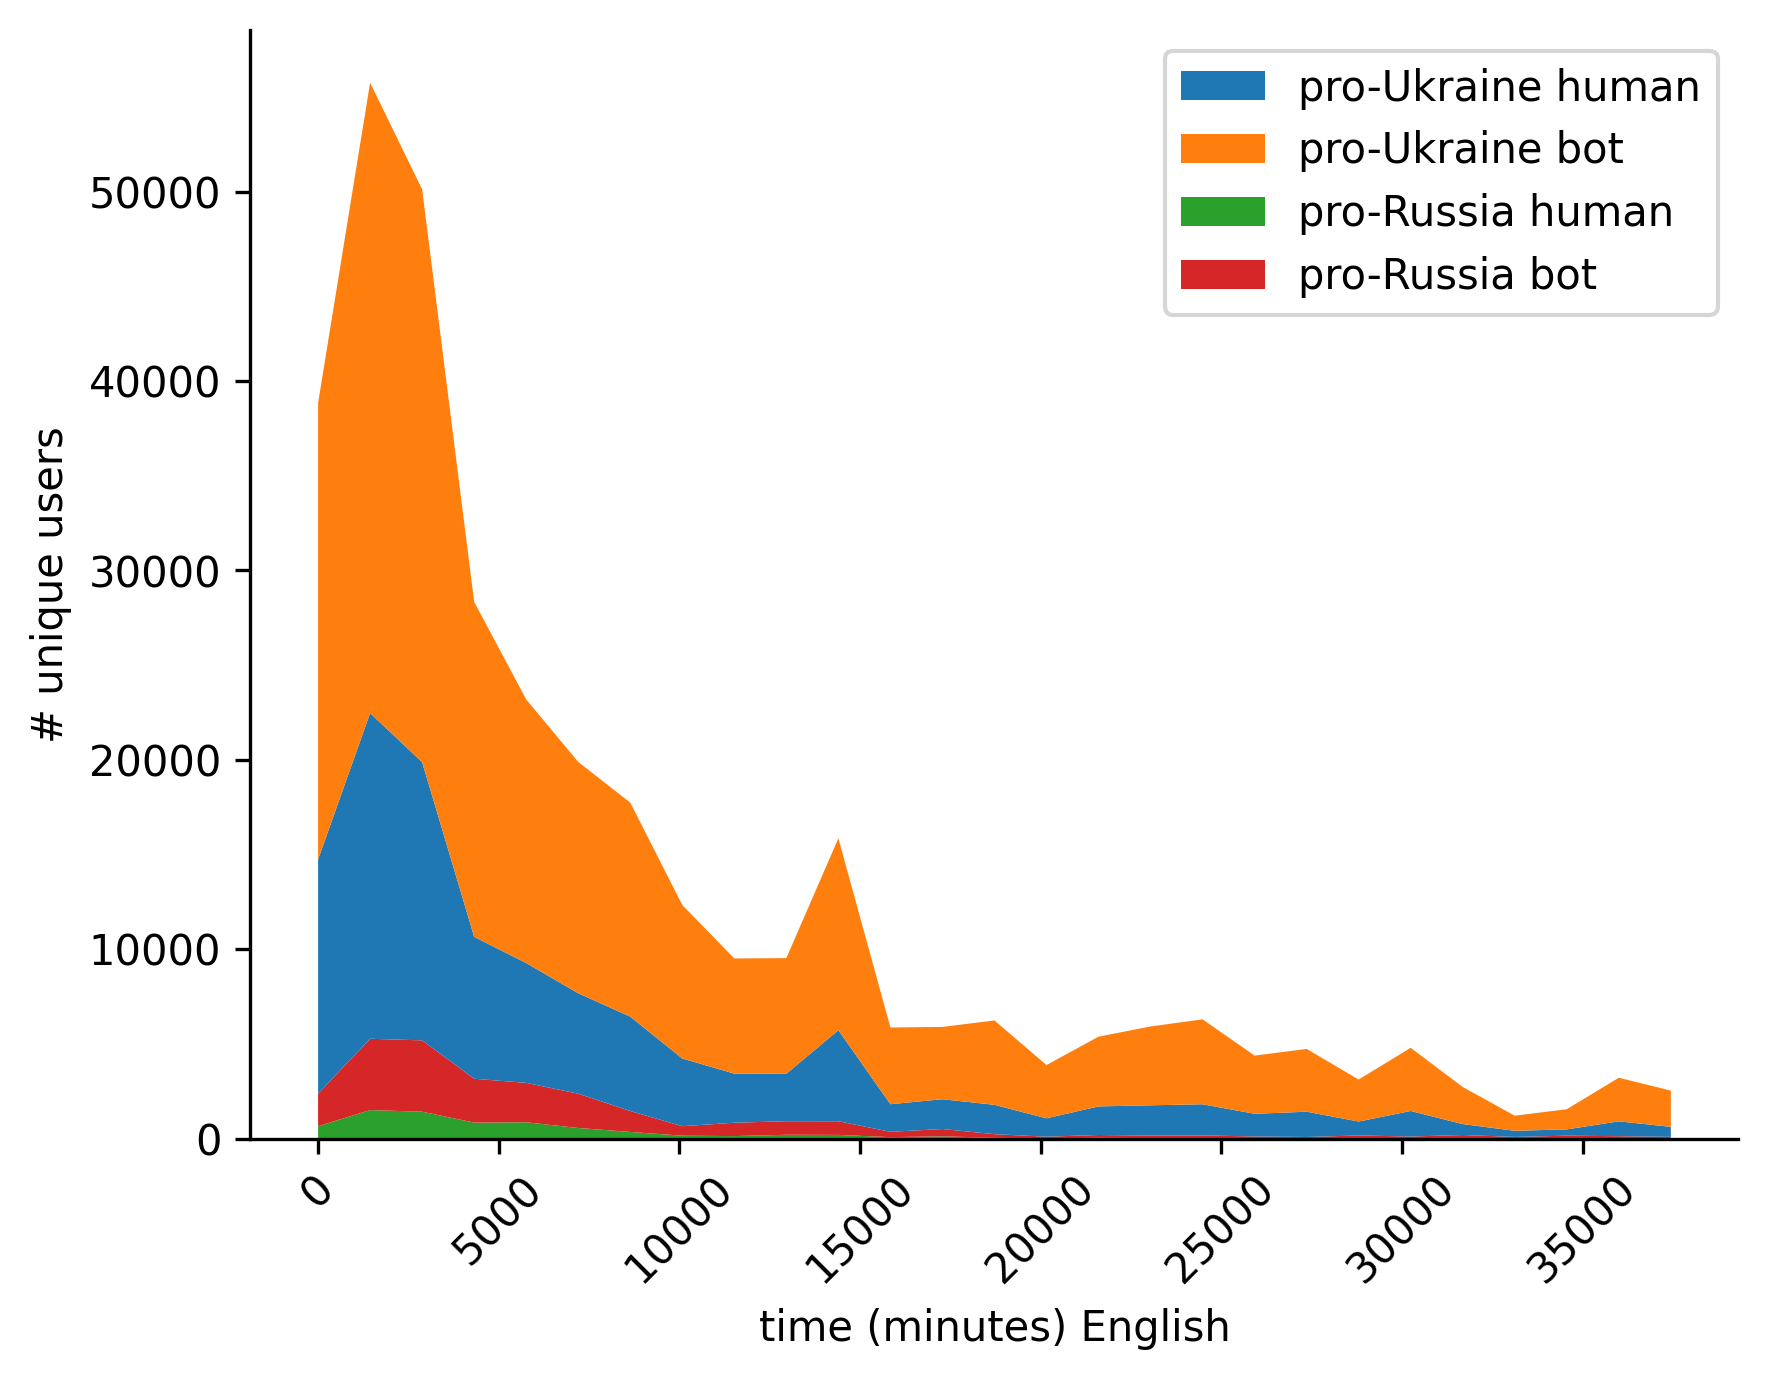

In [19]:
# library
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
import matplotlib.pyplot as plt
datatime=uk_ru_data
datatime=datatime.rename(columns={'class':'Class'})
datatime=datatime.rename(columns={'author.username':'username'})

#lang='ja'
platform='X'
figN=4
cat=['pro-Ukraine human', 'pro-Ukraine bot','pro-Russia bot','pro-Russia human']
y1 =  datatime[datatime['Class']==cat[0]]['username']
y2 =  datatime[datatime['Class']==cat[1]]['username']
y3 = datatime[datatime['Class']==cat[2]]['username']
y4 = datatime[datatime['Class']==cat[3]]['username']
Y=[y1,y2,y3,y4]
m1=y1.max()
m2=y2.max()
m3=y3.max()
m4=y4.max()
M=[m1,m2,m3,m4]
Zip=list(zip(cat,Y,M))

seq=[m1,m2,m3,m4]
seq.sort()

D=[]
for i in range(len(seq)):
    each = seq[i]
    for k in range(len(Zip)):
        each2=Zip[k]
        if each == each2[2]:
            D.append(each2[0])
    
K=[]
for each1 in D:
    for each2 in Zip:
        if each1 ==each2[0]:
            K.append(each2[1])

pals=plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
cols=[]
for each1 in D:
    for each2 in cat:
        if each1==each2:
         
            value=D[D.index(each1)]
            p=cat.index(value)
            print(cols.append(pals[p]))
            
cols=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cols=[cols[2],cols[3],cols[0],cols[1]]

K=[x.reset_index(drop=True)[:28] for x in K]
plt.stackplot(datatime['time (minutes)'].drop_duplicates()[:28].sort_values().to_list(), K,labels=D,colors=cols)#,cat[2],cat[3]])
plt.xticks(rotation=45)
plt.legend(loc='upper right')


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,3,0,1]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.xlabel('time (minutes) English')
plt.ylabel('# unique users')

In [21]:
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')
def round_sigfigs(num, sig_figs):
    num = Decimal(str(num))
    if num == 0:
        return 0
    return round(num, -int(num.adjusted()) + (sig_figs - 1))

# X toxicity

In [22]:
#pip install seaborn==0.12.0

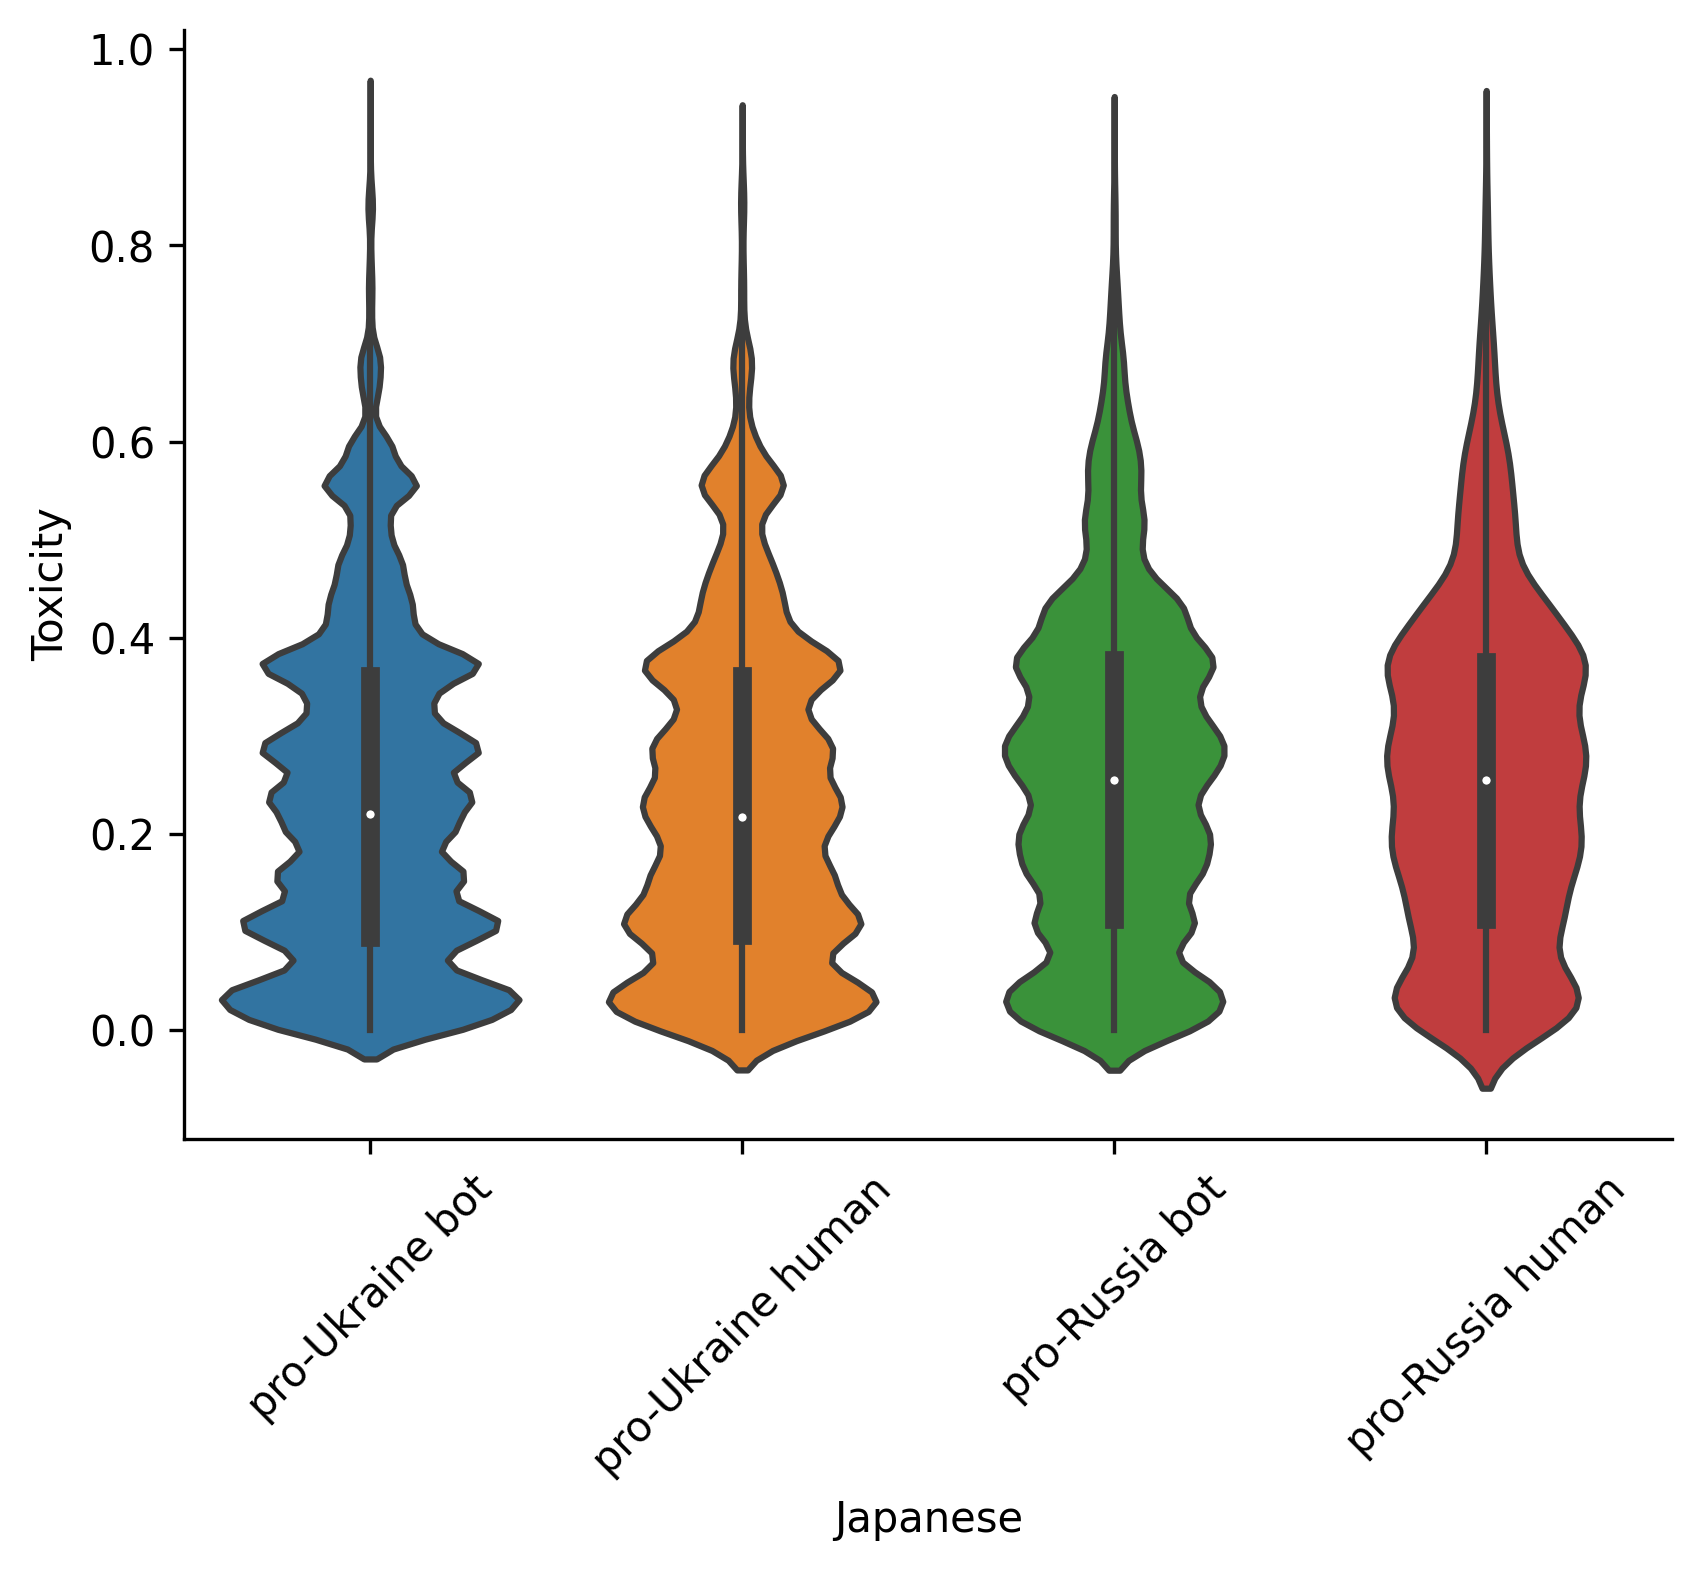

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
lang = 'Japanese'
df = pd.read_csv('./analysis/japan_toxity.csv')

df=df[~df['Toxity'].str.contains('Error')]

df['Toxity']=pd.to_numeric(df['Toxity'])

bucha0325_3core_RT_4class = pd.read_csv("./analysis/japan/ja_class.csv")

bucha0325_3core_RT_4class.dropna(inplace=True)

bucha0325_3core_RT_4class.drop_duplicates('Id',inplace=True)


df['class']=np.where(df['author.username'].isin(bucha0325_3core_RT_4class['Id']), df['author.username'].map(bucha0325_3core_RT_4class.set_index('Id')['class']),'class')

data=df
data=data[data['Toxity'].notna()]



import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt

data=df[df['class']!='class']
ax=sns.violinplot(data=data,y='Toxity',x='class', orient='v',order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
plt.xticks(rotation=45)
plt.xlabel(lang)
plt.ylabel('Toxicity')
sns.despine()



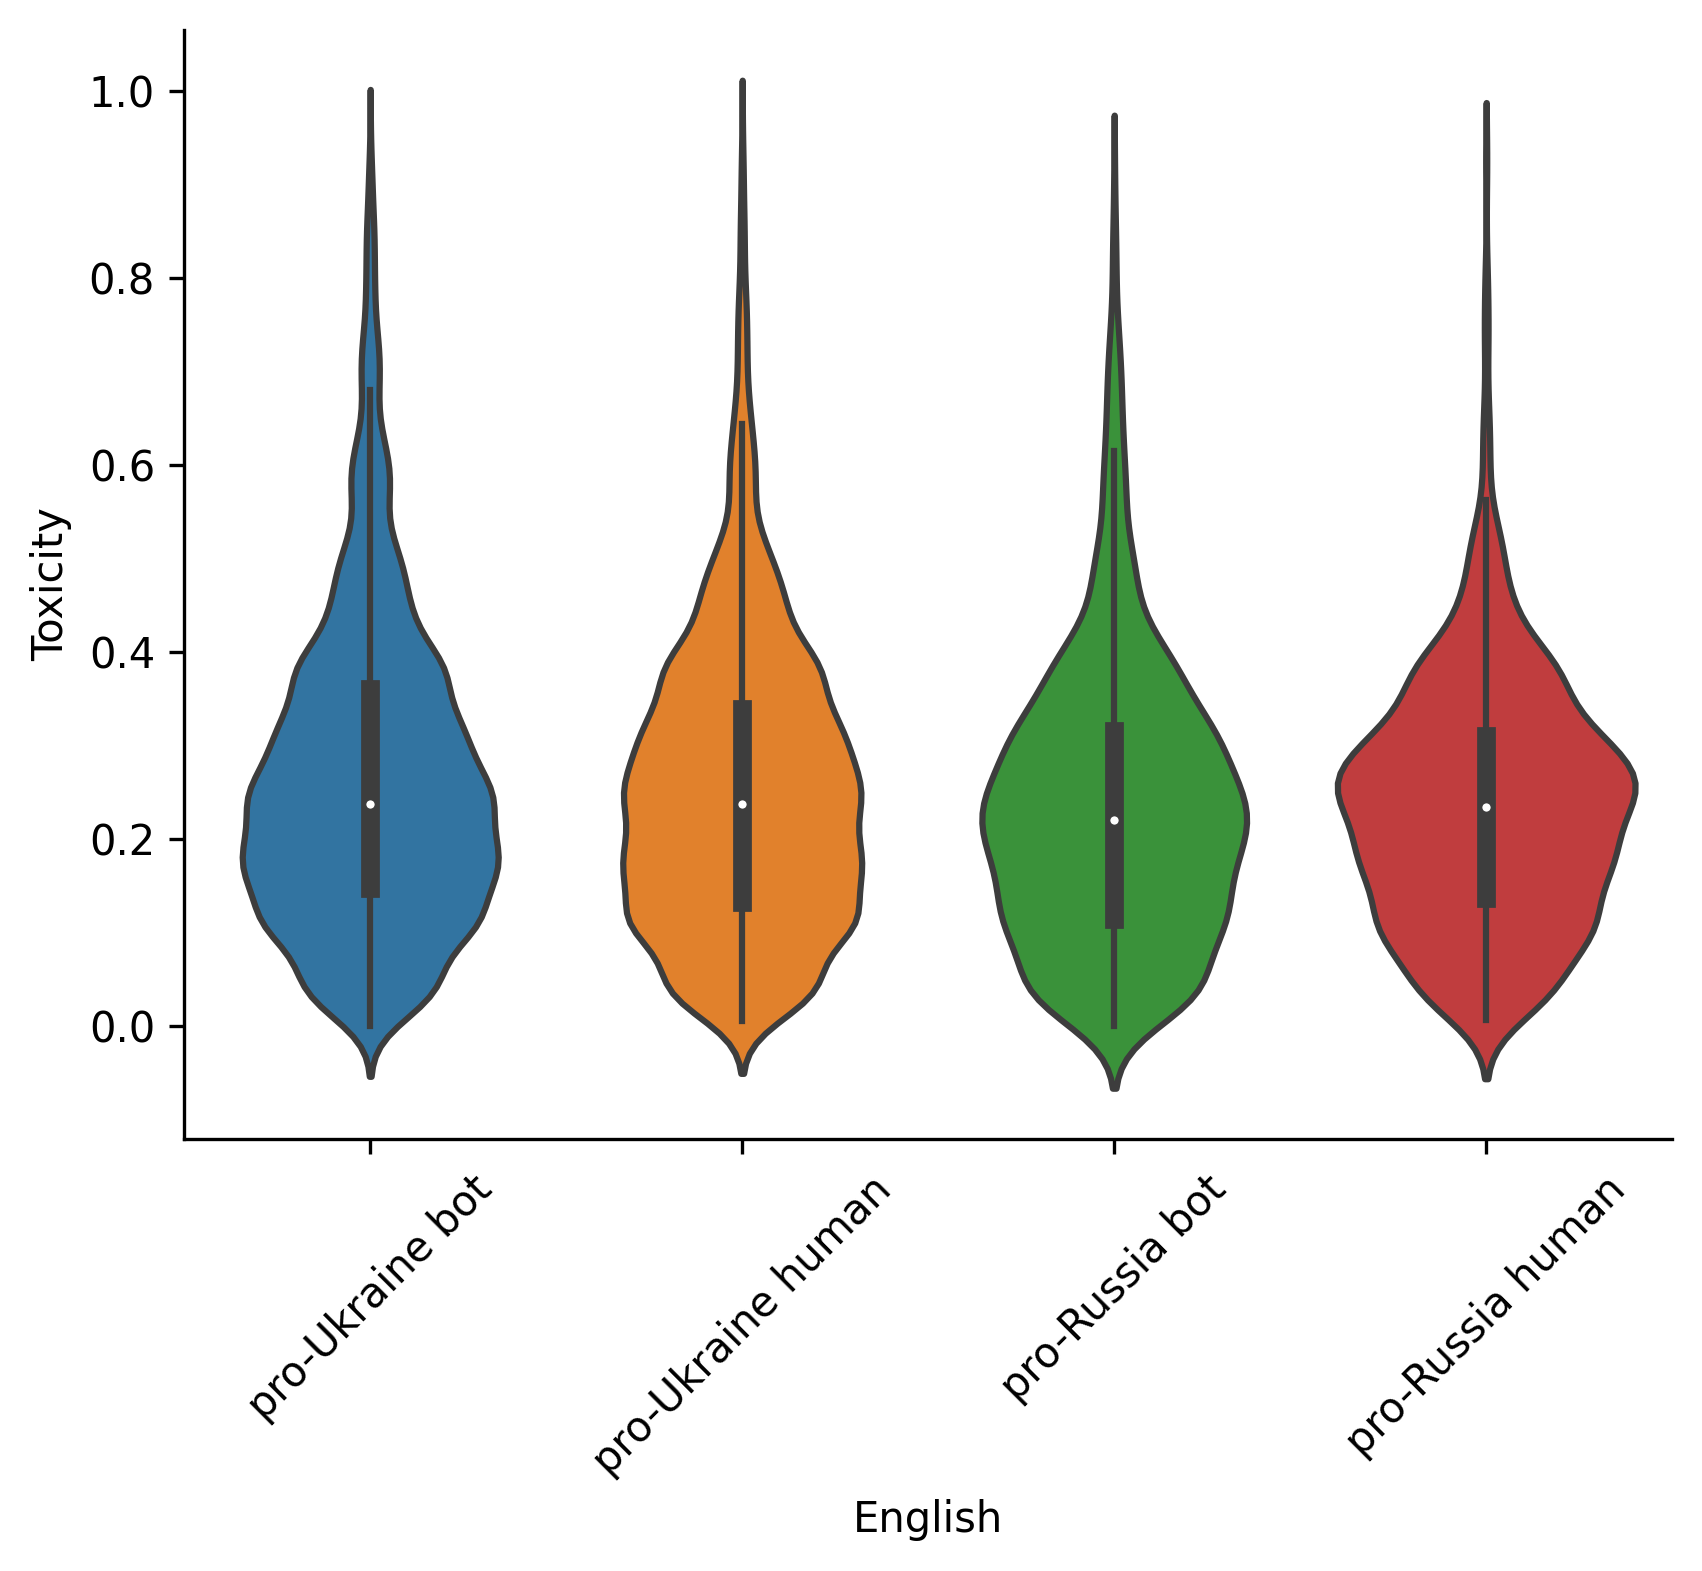

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import pandas as pd
lang = 'English'
df = pd.read_csv('./analysis/english_toxity.csv')

df=df[~df['Toxity'].str.contains('Error')]


df['Toxity']=pd.to_numeric(df['Toxity'])

bucha0325_3core_RT_4class = pd.read_csv("./analysis/bucha0325_3core_RT_4class.csv")

import numpy as np
df['class']=np.where(df['author.username'].isin(bucha0325_3core_RT_4class['Id']), df['author.username'].map(bucha0325_3core_RT_4class.set_index('Id')['class']),'class')

data=df[df['class']!='class']
ax=sns.violinplot(data=data,y='Toxity',x='class', orient='v',order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
plt.xticks(rotation=45)
plt.xlabel(lang)
plt.ylabel('Toxicity')
sns.despine()


# Reddit Toxicity

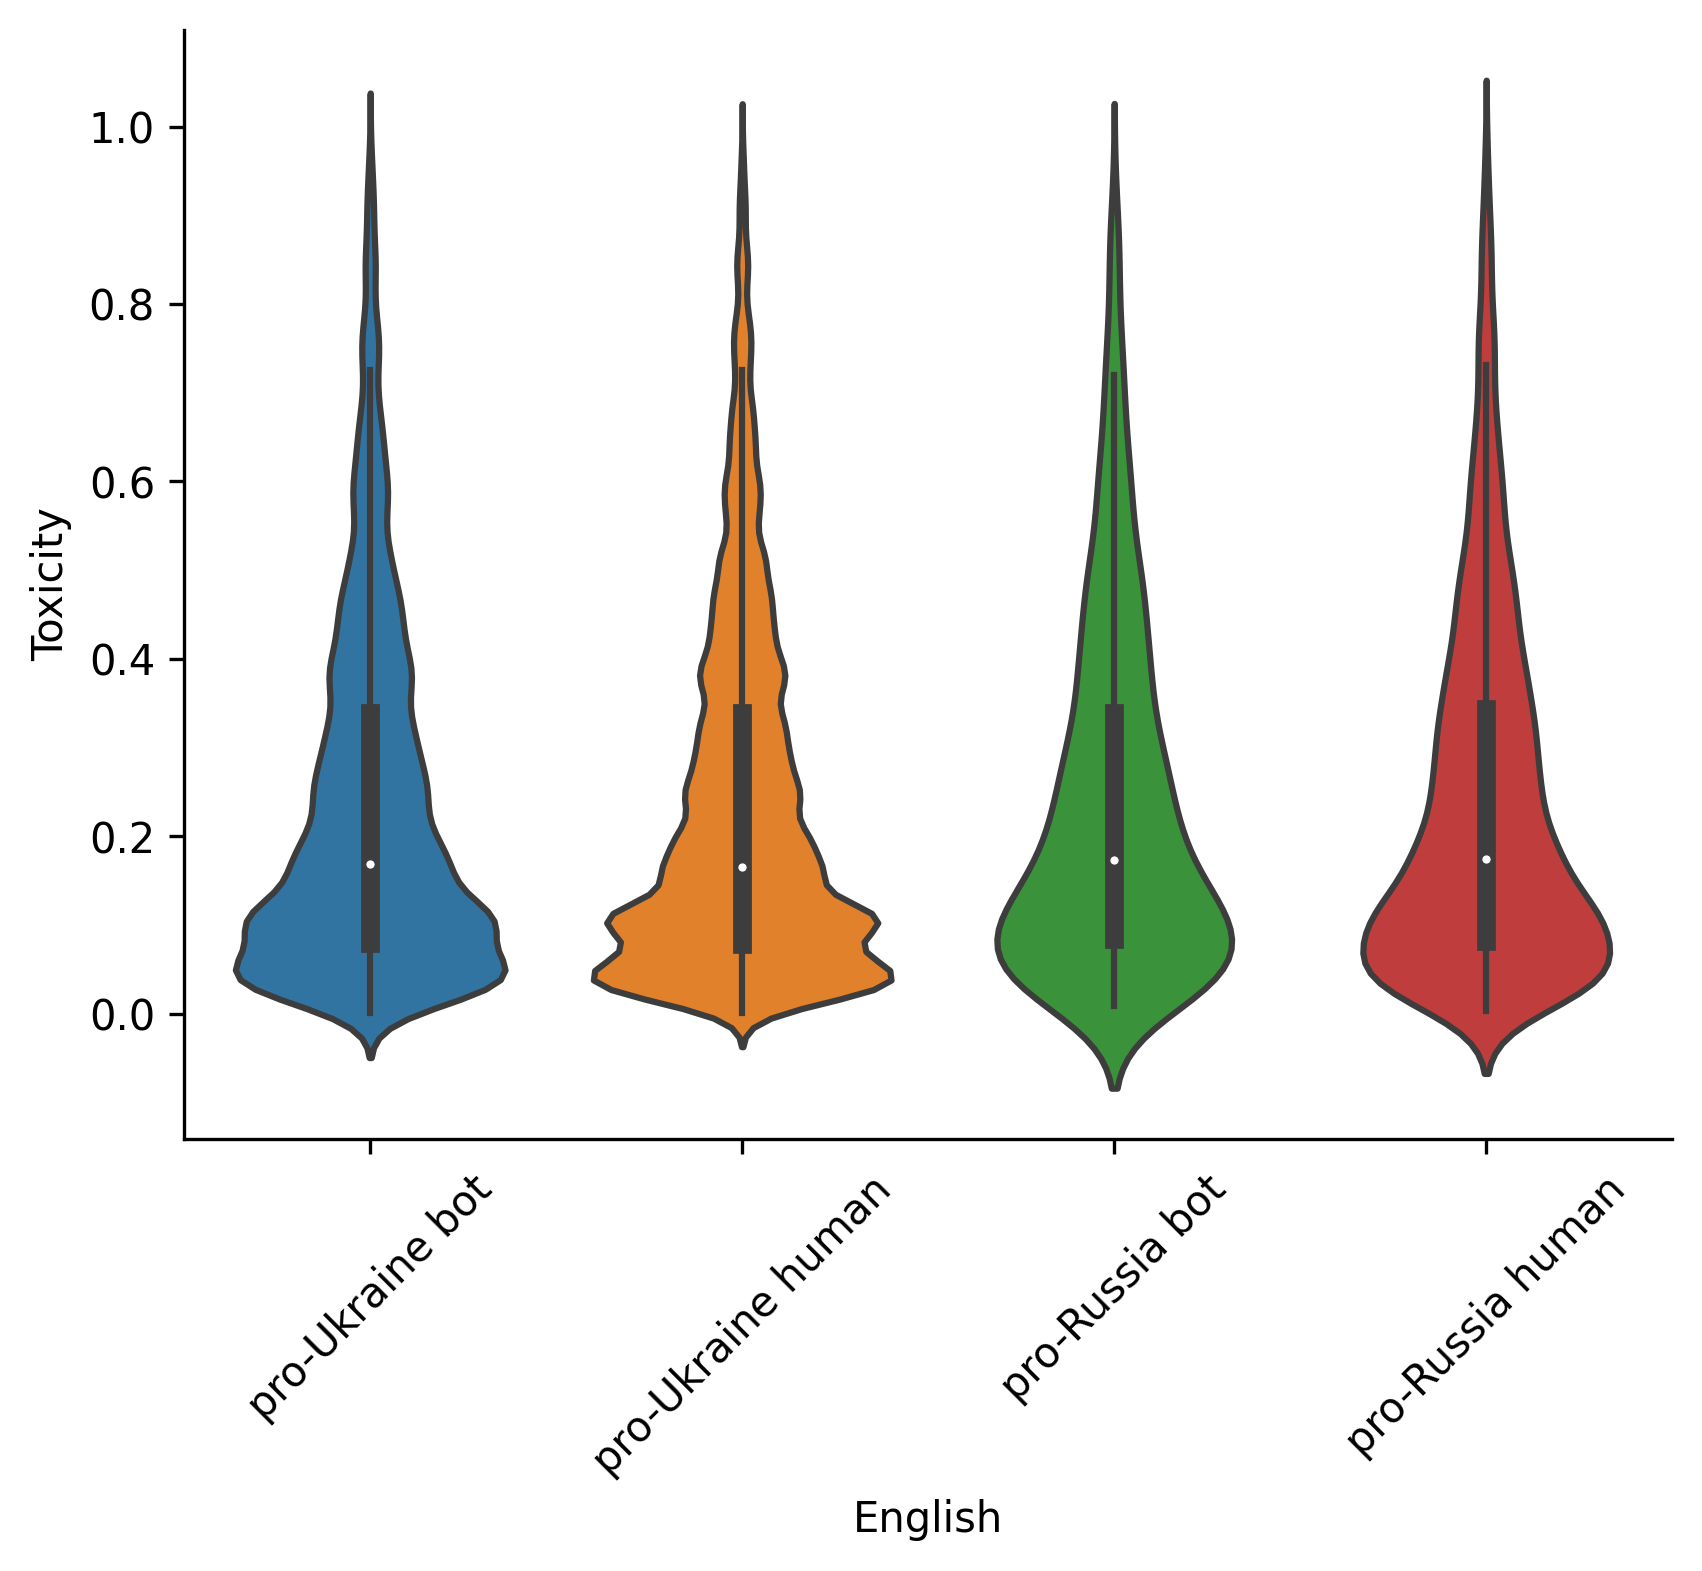

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

lang='en'

df=pd.read_csv('test_label_Bucha_'+lang+'.csv')

df['Class']=df['stance']+' '+df['class']

data=pd.read_csv('test_toxity_'+lang+'.csv')

dic_Class=dict(zip(df['author'],df['Class']))

data['Class']=data['author'].map(dic_Class)

data=data[~data['TOXICITY'].str.contains('HttpError 400')]

data=data[data['TOXICITY']!='TOXICITY']

data['TOXICITY']=pd.to_numeric(data['TOXICITY'])

data=data[data['Class'].notna()]

data=data[~data['Class'].str.contains('label',case=False)]
dataen=data

ax=sns.violinplot(data=data,y='TOXICITY',x='Class', orient='v',order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"],hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
plt.xticks(rotation=45)
plt.xlabel('English')
plt.ylabel('Toxicity')
sns.despine()
plt.show()


4156


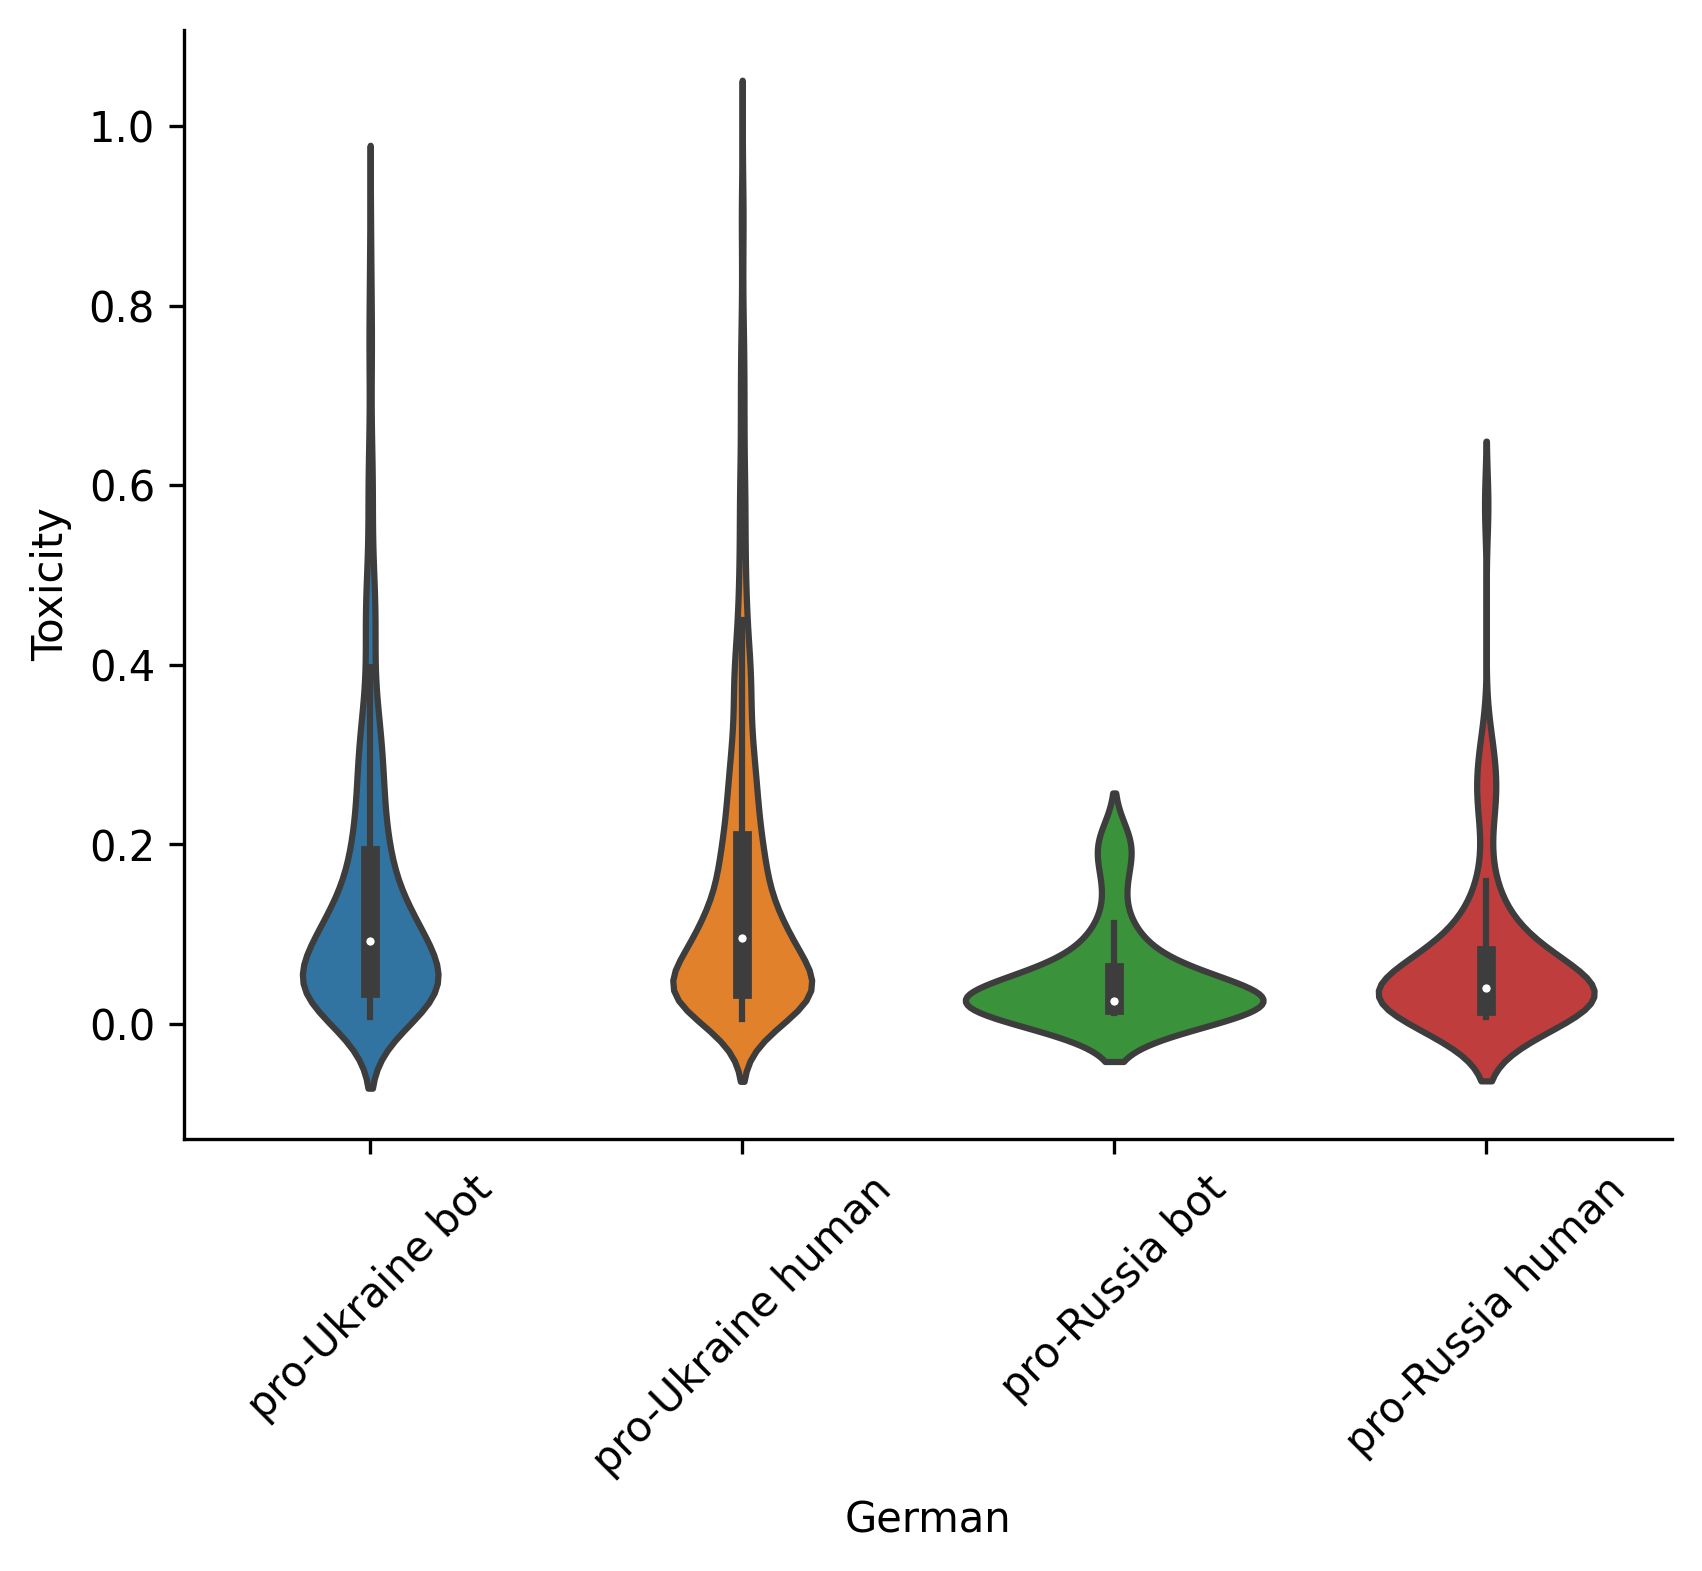

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
lang='de'#['de','fr','ru']

if lang=='de':
    xlabel='German'
elif lang=='fr':
    xlabel='French'
elif lang=='ru':
    xlabel='Russia'
    
data=pd.read_csv('test_toxity_'+lang+'.csv')
print(data.drop_duplicates(subset=['author']).shape[0])
data=data[~data['TOXICITY'].str.contains('HttpError 400')]
data=data[data['TOXICITY']!='TOXICITY']
data['TOXICITY']=pd.to_numeric(data['TOXICITY'])
label_file=pd.read_csv('label_file_'+lang+'.csv')
Class_dic=dict(zip(label_file.author,label_file.Class))

data['Class']=data['author'].map(Class_dic)
datade=data
ax=sns.violinplot(data=data,y='TOXICITY',x='Class', legend='auto',orient='v',order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"],hue_order=["pro-Ukraine bot","pro-Ukraine human", "pro-Russia bot", "pro-Russia human"])
plt.xticks(rotation=45)
plt.xlabel(xlabel)
plt.ylabel('Toxicity')
sns.despine()
plt.show()